COMPREHENSIVE OPTIONS ANALYSIS TOOLKIT WITH ML


Do you want to work in offline mode (use only existing data)? (y/n):  n
Enter the ticker symbol to analyze (e.g., SPY, AAPL, MSFT, TSLA, F, AMD):  SPY
Found existing option data for SPY. Use it? (y/n):  n
Would you like to use machine learning for enhanced analysis? (y/n):  y



Anomaly Detection Sensitivity:
1. Low: Conservative detection with fewer signals
2. Medium: Balanced detection sensitivity (default)
3. High: Aggressive detection to find more potential opportunities


Select sensitivity level [2]:  3



Running ML-enhanced analysis with high sensitivity...
Fetching new option data for SPY (attempt 1/3)...
Getting data for SPY...
Current price: $523.68
Available expirations: 32
First few expirations: ('2025-04-08', '2025-04-09', '2025-04-10')

Selected 6 expirations:
  - 2025-04-25 (DTE: 17)
  - 2025-05-02 (DTE: 24)
  - 2025-05-16 (DTE: 38)
  - 2025-05-30 (DTE: 52)
  - 2025-06-30 (DTE: 83)
  - 2025-07-31 (DTE: 114)

Processing expiration: 2025-04-25 (DTE: 17)
  Call options: 122 contracts
  Put options: 113 contracts

Sample call option data:
        contractSymbol             lastTradeDate  strike  lastPrice   bid  \
61  SPY250425C00564000 2025-04-08 13:33:20+00:00   564.0       1.23  1.07   

     ask  change  percentChange  volume  openInterest  impliedVolatility  \
61  1.17    0.05       4.237294      26           544           0.244514   

    inTheMoney contractSize currency  
61       False      REGULAR      USD  

Processing expiration: 2025-05-02 (DTE: 24)
  Call options: 98 

Model: "VolSurfaceAutoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ vol_surface_input   │ (None, 6, 11, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_conv1 (Conv2D)  │ (None, 6, 11, 32) │        320 │ vol_surface_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_bn1             │ (None, 6, 11, 32) │        128 │ enc_conv1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_conv2 (Conv2D)  │ (None, 6, 11, 64) │     18,496 │ enc_bn1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_bn2             │ (None, 6, 11, 64) │        256 │ enc_conv2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_pool1           │ (None, 3, 6, 64)  │          0 │ enc_bn2[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_conv3 (Conv2D)  │ (None, 3, 6, 64)  │     36,928 │ enc_pool1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc_bn3             │ (None, 3, 6, 64)  │        256 │ enc_conv3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck (Conv2D) │ (None, 3, 6, 32)  │     18,464 │ enc_bn3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck_bn       │ (None, 3, 6, 32)  │        128 │ bottleneck[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_conv1 (Conv2D)  │ (None, 3, 6, 64)  │     18,496 │ bottleneck_bn[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_bn1             │ (None, 3, 6, 64)  │        256 │ dec_conv1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ residual1 (Add)     │ (None, 3, 6, 64)  │          0 │ dec_bn1[0][0],    │
│                     │                   │            │ enc_bn3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_conv2 (Conv2D)  │ (None, 3, 6, 64)  │     36,928 │ residual1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_bn2             │ (None, 3, 6, 64)  │        256 │ dec_conv2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_upsample1       │ (None, 6, 12, 64) │          0 │ dec_bn2[0][0]     │
│ (UpSampling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_conv3 (Conv2D)  │ (None, 6, 12, 32) │     18,464 │ dec_upsample1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_bn3             │ (None, 6, 12, 32) │        128 │ dec_conv3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_output       │ (None, 6, 11, 32) │          0 │ dec_bn3[0][0]     │
│ (Resizing)          │                   │            │                 

 Total params: 149,793 (585.13 KB)

 Trainable params: 149,089 (582.38 KB)

 Non-trainable params: 704 (2.75 KB)


=== TRAINING VOLATILITY SURFACE AUTOENCODER ===
Creating market-relevant training dataset...
Creating augmented training dataset with 50 variations...
Created dataset with 51 surfaces
Training set: 41 samples
Validation set: 10 samples

Training autoencoder with early stopping and learning rate scheduling...
Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0588 - val_loss: 0.0294 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8764e-04 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8m


Enter your choice (number):  2


Displaying trading_signals_3d...


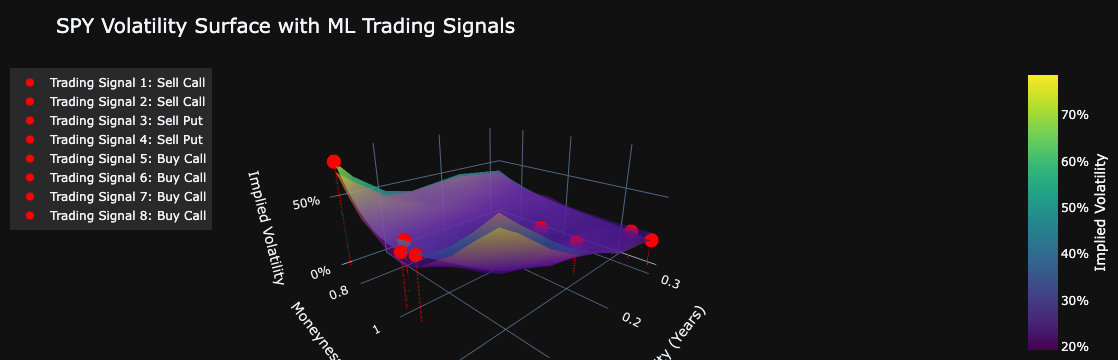

Displaying mispricing_map...



Do you want to save the analysis to a report file? (y/n):  y



Report saved to SPY_analysis_report.txt

Analysis complete. Thank you for using the Options Analysis Toolkit.


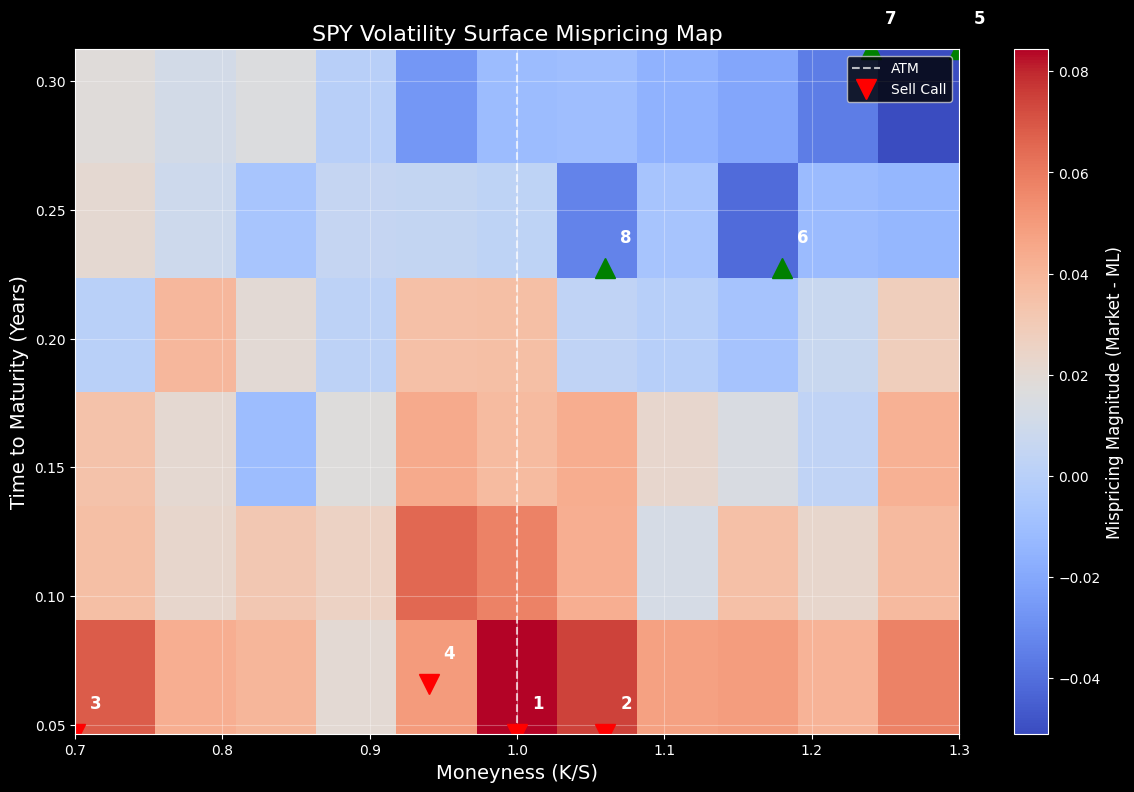

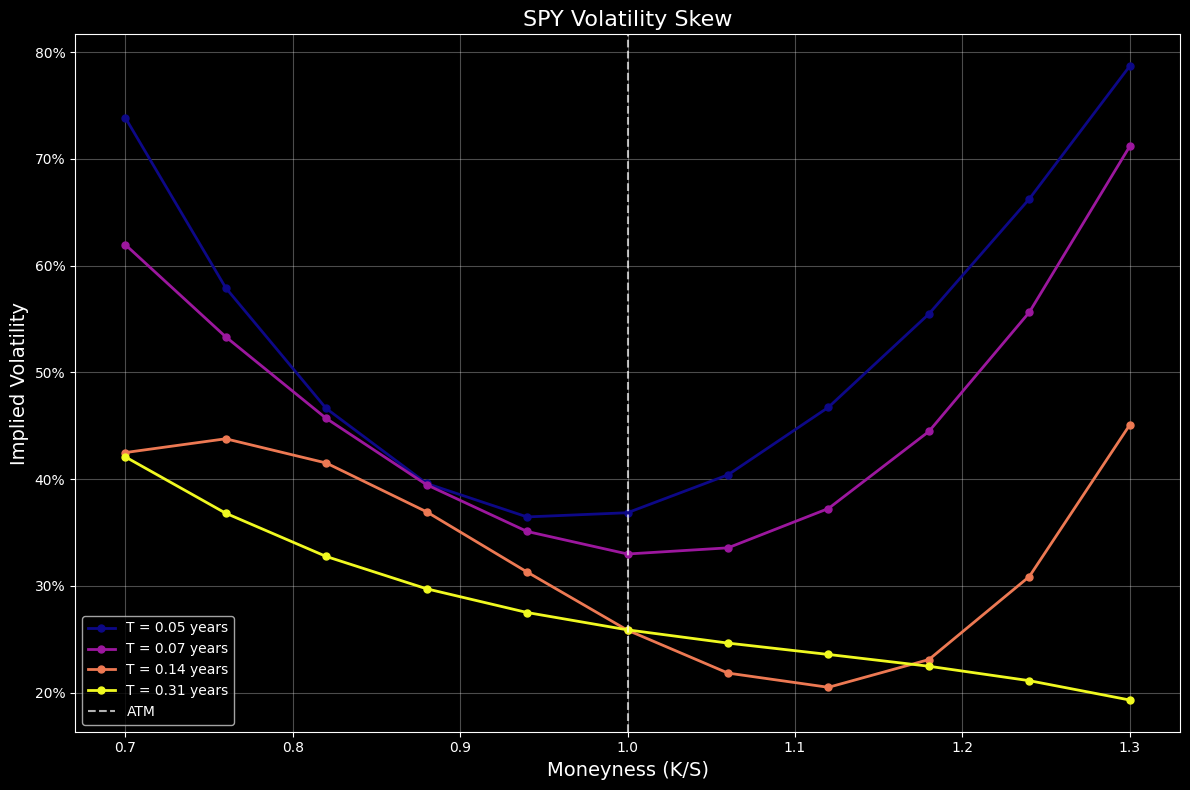

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import sys
import time
import os
import glob
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata, RectBivariateSpline
from scipy.stats import norm
from scipy import optimize
from sklearn.cluster import KMeans

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.layers import BatchNormalization, Add, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# Visualization imports
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

class OptionsDataFetcher:
    """
    Fetches option data from Yahoo Finance API
    """
    def __init__(self):
        self.current_date = datetime.datetime.now().date()
    
    def get_option_chain(self, ticker="SPY", dte_min=10, dte_max=120):
        """
        Get option chain data for a ticker using Yahoo Finance API
        
        Parameters:
        -----------
        ticker : str
            Ticker symbol
        dte_min : int
            Minimum days to expiration
        dte_max : int
            Maximum days to expiration
            
        Returns:
        --------
        dict: Option chain data with calls and puts
        """
        # Remove any leading hyphens or special characters from ticker
        ticker = ticker.strip().lstrip('-').upper()
        if not ticker:
            print("Invalid ticker symbol")
            return None
            
        # Get current date
        current_date = datetime.datetime.now().date()
        
        # Create the ticker object
        print(f"Getting data for {ticker}...")
        
        try:
            # Create ticker object with timeout
            stock = yf.Ticker(ticker)
            
            # Get basic info (with error handling)
            try:
                info = stock.info
                if not info:
                    print(f"Could not get info for {ticker}. Ticker may be invalid.")
                    return None
                    
                spot_price = info.get('regularMarketPrice', info.get('currentPrice', None))
                if spot_price is None:
                    print(f"Could not get current price for {ticker}")
                    # Try to get price from history as fallback
                    hist = stock.history(period="1d")
                    if not hist.empty:
                        spot_price = hist['Close'].iloc[-1]
                        print(f"Using price from history: ${spot_price:.2f}")
                    else:
                        print(f"Could not determine price for {ticker}")
                        return None
                else:
                    print(f"Current price: ${spot_price:.2f}")
            except Exception as e:
                print(f"Error getting ticker info: {str(e)}")
                return None
            
            # Get available expiration dates
            try:
                expirations = stock.options
                if not expirations:
                    print(f"No options available for {ticker}")
                    return None
                    
                print(f"Available expirations: {len(expirations)}")
                print(f"First few expirations: {expirations[:min(3, len(expirations))]}")
            except Exception as e:
                print(f"Error getting expirations: {str(e)}")
                return None
            
            # Filter expirations based on DTE
            filtered_expirations = []
            for exp in expirations:
                try:
                    exp_date = datetime.datetime.strptime(exp, '%Y-%m-%d').date()
                    dte = (exp_date - current_date).days
                    if dte_min <= dte <= dte_max:
                        filtered_expirations.append((exp, dte))
                except Exception as e:
                    print(f"Error processing expiration date {exp}: {str(e)}")
                    continue
            
            if not filtered_expirations:
                print(f"No options found for {ticker} within the DTE range {dte_min}-{dte_max}")
                return None
            
            # Sort by DTE
            filtered_expirations.sort(key=lambda x: x[1])
            
            # Select multiple expirations (up to 6)
            # Choose a good spread of expirations
            num_expirations = min(6, len(filtered_expirations))
            selected_expirations = []
            
            if num_expirations == 1:
                selected_expirations = [filtered_expirations[0]]
            else:
                # Select evenly spaced expirations across the range
                indices = np.linspace(0, len(filtered_expirations)-1, num_expirations).astype(int)
                selected_expirations = [filtered_expirations[i] for i in indices]
            
            print(f"\nSelected {len(selected_expirations)} expirations:")
            for exp, dte in selected_expirations:
                print(f"  - {exp} (DTE: {dte})")
            
            # Get option chain for each expiration
            calls_data = []
            puts_data = []
            
            # Set a standard ATM volatility for theoretical prices if needed
            # This will be refined later in the enhancement step
            base_atm_vol = 0.20  
            
            # Get risk-free rate
            risk_free_rate = self._get_risk_free_rate()
            
            for exp, dte in selected_expirations:
                print(f"\nProcessing expiration: {exp} (DTE: {dte})")
                
                try:
                    # Get option chain for this expiration with retry on failure
                    max_retries = 3
                    for retry in range(max_retries):
                        try:
                            options = stock.option_chain(exp)
                            break
                        except Exception as e:
                            if retry < max_retries - 1:
                                print(f"Retry {retry+1}/{max_retries} for {exp}...")
                                time.sleep(1)  # Wait before retrying
                            else:
                                raise e
                    
                    calls = options.calls.copy()
                    puts = options.puts.copy()
                    
                    # Print sample data
                    print(f"  Call options: {len(calls)} contracts")
                    print(f"  Put options: {len(puts)} contracts")
                    
                    if len(calls) > 0:
                        print("\nSample call option data:")
                        sample_idx = min(len(calls) // 2, len(calls) - 1)  # Ensure valid index
                        print(calls.iloc[sample_idx:sample_idx+1])
                    
                    # Add expiration date to the dataframes
                    calls['expirationDate'] = exp
                    puts['expirationDate'] = exp
                    
                    # Calculate time to expiration in years
                    tte = dte / 365.0
                    
                    calls['tte'] = tte
                    puts['tte'] = tte
                    
                    # Calculate moneyness
                    if spot_price:
                        calls['moneyness'] = calls['strike'] / spot_price
                        puts['moneyness'] = puts['strike'] / spot_price
                    
                    # Handle missing bid/ask values
                    calls['bid'] = calls['bid'].fillna(0)
                    calls['ask'] = calls['ask'].fillna(0)
                    puts['bid'] = puts['bid'].fillna(0)
                    puts['ask'] = puts['ask'].fillna(0)
                    
                    # Calculate mid prices with safeguards
                    calls['midPrice'] = calls.apply(
                        lambda row: (row['bid'] + row['ask']) / 2 if row['bid'] > 0 and row['ask'] > 0 
                        else row['lastPrice'], axis=1)
                    puts['midPrice'] = puts.apply(
                        lambda row: (row['bid'] + row['ask']) / 2 if row['bid'] > 0 and row['ask'] > 0 
                        else row['lastPrice'], axis=1)
                    
                    # Ensure we always have a usable price
                    calculator = OptionsCalculator(risk_free_rate)
                    
                    # For calls
                    calls['usePrice'] = calls.apply(
                        lambda row: row['midPrice'] if row['midPrice'] > 0 
                        else (row['lastPrice'] if row['lastPrice'] > 0 
                              else (max(row['bid'], row['ask']) if max(row['bid'], row['ask']) > 0 
                                    else calculator._estimate_theoretical_price(
                                        spot_price, row['strike'], tte, risk_free_rate,
                                        base_atm_vol, 'call'))), axis=1)
                    
                    # For puts
                    puts['usePrice'] = puts.apply(
                        lambda row: row['midPrice'] if row['midPrice'] > 0 
                        else (row['lastPrice'] if row['lastPrice'] > 0 
                              else (max(row['bid'], row['ask']) if max(row['bid'], row['ask']) > 0 
                                    else calculator._estimate_theoretical_price(
                                        spot_price, row['strike'], tte, risk_free_rate, 
                                        base_atm_vol, 'put'))), axis=1)
                    
                    # Ensure implied volatility is reasonable (will be refined later)
                    calls['impliedVolatility'] = calls['impliedVolatility'].fillna(0)
                    puts['impliedVolatility'] = puts['impliedVolatility'].fillna(0)
                    
                    # Replace zero or very low IV with reasonable estimates
                    calls['impliedVolatility'] = calls.apply(
                        lambda row: row['impliedVolatility'] if row['impliedVolatility'] > 0.05
                        else (0.30 if abs(row['moneyness'] - 1) > 0.1 else 0.20), axis=1)
                    
                    puts['impliedVolatility'] = puts.apply(
                        lambda row: row['impliedVolatility'] if row['impliedVolatility'] > 0.05
                        else (0.30 if abs(row['moneyness'] - 1) > 0.1 else 0.20), axis=1)
                    
                    # Add option type
                    calls['option_type'] = 'call'
                    puts['option_type'] = 'put'
                    
                    # Add days to expiration
                    calls['dte'] = dte
                    puts['dte'] = dte
                    
                    # Add to data lists
                    calls_data.append(calls)
                    puts_data.append(puts)
                    
                except Exception as e:
                    print(f"Error processing expiration {exp}: {str(e)}")
                    continue
            
            if not calls_data or not puts_data:
                print(f"No valid option chains found for {ticker}")
                return None
            
            # Combine data from all expirations
            all_calls = pd.concat(calls_data, ignore_index=True)
            all_puts = pd.concat(puts_data, ignore_index=True)
            
            # Return dictionary with calls and puts
            option_data = {
                'ticker': ticker,
                'spot_price': spot_price,
                'calls': all_calls,
                'puts': all_puts,
                'quote_date': current_date,
                'risk_free_rate': risk_free_rate
            }
            
            return option_data
            
        except Exception as e:
            print(f"Error retrieving option data: {str(e)}")
            return None
    
    def _get_risk_free_rate(self):
        """
        Get risk-free rate estimate - in a real system, this would query actual treasury yields
        Here we'll use a placeholder value
        
        Returns:
        --------
        float: Estimated risk-free rate
        """
        # In a full implementation, pull treasury yields based on option maturities
        # For simplicity, we'll use a fixed value here
        return 0.05  # 5%

    def analyze_option_data(self, option_data):
        """
        Display summary statistics and sample data for option chains
        """
        if option_data is None:
            print("No option data available for analysis")
            return
        
        ticker = option_data['ticker']
        spot_price = option_data['spot_price']
        calls = option_data['calls']
        puts = option_data['puts']
        
        print("\n" + "="*50)
        print(f"OPTION CHAIN ANALYSIS FOR {ticker}")
        print("="*50)
        
        print(f"\nSpot Price: ${spot_price:.2f}")
        print(f"Quote Date: {option_data['quote_date']}")
        print(f"Total Call Options: {len(calls)}")
        print(f"Total Put Options: {len(puts)}")
        
        # Analyze expirations
        expirations = sorted(calls['expirationDate'].unique())
        print(f"\nAvailable Expirations: {len(expirations)}")
        for exp in expirations:
            exp_calls = calls[calls['expirationDate'] == exp]
            exp_puts = puts[puts['expirationDate'] == exp]
            print(f"  - {exp}: {len(exp_calls)} calls, {len(exp_puts)} puts")
        
        # Analyze strikes
        if len(calls) > 0 and len(puts) > 0:
            call_strikes = sorted(calls['strike'].unique())
            put_strikes = sorted(puts['strike'].unique())
            print(f"\nCall Strike Range: ${min(call_strikes):.2f} to ${max(call_strikes):.2f}")
            print(f"Put Strike Range: ${min(put_strikes):.2f} to ${max(put_strikes):.2f}")
        
        # Show sample ATM call options across expirations
        print("\nSample ATM Call Options Across Expirations:")
        print("-------------------------------------------")
        
        # Define ATM range
        atm_calls = calls[(calls['moneyness'] > 0.95) & (calls['moneyness'] < 1.05)]
        
        if len(atm_calls) > 0:
            sample_calls = []
            
            for exp in expirations:
                # Get ATM calls for this expiration
                exp_atm_calls = atm_calls[atm_calls['expirationDate'] == exp]
                
                if len(exp_atm_calls) > 0:
                    try:
                        # Find closest to ATM
                        moneyness_diffs = abs(exp_atm_calls['moneyness'] - 1.0)
                        closest_idx = moneyness_diffs.idxmin()
                        closest_atm = exp_atm_calls.loc[closest_idx]
                        sample_calls.append(closest_atm)
                    except Exception as e:
                        print(f"Error finding ATM option for {exp}: {e}")
                        continue
            
            if sample_calls:
                # Convert to DataFrame and display
                sample_df = pd.DataFrame(sample_calls)
                display_cols = ['strike', 'expirationDate', 'tte', 'bid', 'ask', 'lastPrice', 
                              'volume', 'openInterest', 'impliedVolatility', 'moneyness', 'usePrice']
                
                # Only include columns that exist
                display_cols = [col for col in display_cols if col in sample_df.columns]
                print(sample_df[display_cols].to_string())
            else:
                print("No suitable ATM call options found")
        else:
            print("No ATM call options found")
        
        # Check for liquidity
        liquid_calls = calls[calls['volume'] > 10]
        liquid_puts = puts[puts['volume'] > 10]
        
        print(f"\nLiquid Options (volume > 10):")
        if len(liquid_calls) > 0:
            print(f"  - Calls: {len(liquid_calls)} ({len(liquid_calls)/len(calls)*100:.1f}% of total)")
        else:
            print("  - Calls: 0 (0.0% of total)")
            
        if len(liquid_puts) > 0:
            print(f"  - Puts: {len(liquid_puts)} ({len(liquid_puts)/len(puts)*100:.1f}% of total)")
        else:
            print("  - Puts: 0 (0.0% of total)")
        
        # Show implied volatility statistics
        call_iv = calls['impliedVolatility'].dropna()
        put_iv = puts['impliedVolatility'].dropna()
        
        if len(call_iv) > 0 and len(put_iv) > 0:
            print("\nImplied Volatility Statistics:")
            print(f"  - Call IV Range: {call_iv.min():.2%} to {call_iv.max():.2%}, Mean: {call_iv.mean():.2%}")
            print(f"  - Put IV Range: {put_iv.min():.2%} to {put_iv.max():.2%}, Mean: {put_iv.mean():.2%}")
        
        # Data density analysis
        print("\nData Density Analysis:")
        print("---------------------")
        
        # Check strike coverage
        if 'strike' in calls.columns:
            unique_strikes = len(calls['strike'].unique())
            print(f"Unique strike prices: {unique_strikes}")
        
        # Check expiration coverage
        if 'expirationDate' in calls.columns:
            unique_expirations = len(calls['expirationDate'].unique())
            print(f"Unique expirations: {unique_expirations}")
        
        # Check for completeness of volatility surface
        total_possible_points = unique_strikes * unique_expirations
        actual_points = len(calls)
        completeness = (actual_points / total_possible_points) * 100 if total_possible_points > 0 else 0
        
        print(f"Volatility surface completeness: {completeness:.1f}% ({actual_points}/{total_possible_points} points)")
        
        # Check volume profile
        if 'volume' in calls.columns:
            zero_volume = len(calls[calls['volume'] == 0])
            low_volume = len(calls[(calls['volume'] > 0) & (calls['volume'] <= 10)])
            medium_volume = len(calls[(calls['volume'] > 10) & (calls['volume'] <= 100)])
            high_volume = len(calls[calls['volume'] > 100])
            
            print("\nVolume Profile (calls):")
            print(f"  - Zero volume: {zero_volume} ({zero_volume/len(calls)*100:.1f}%)")
            print(f"  - Low volume (1-10): {low_volume} ({low_volume/len(calls)*100:.1f}%)")
            print(f"  - Medium volume (11-100): {medium_volume} ({medium_volume/len(calls)*100:.1f}%)")
            print(f"  - High volume (>100): {high_volume} ({high_volume/len(calls)*100:.1f}%)")
        
        print("\nData ready for further analysis")
    
    def save_option_data_to_csv(self, option_data, filename=None):
        """
        Save option data to CSV files
        
        Parameters:
        -----------
        option_data : dict
            Option data from get_option_chain
        filename : str, optional
            Base filename (without extension)
            
        Returns:
        --------
        tuple: (calls_file, puts_file, meta_file) - paths to the saved files
        """
        if option_data is None:
            print("No option data to save")
            return None, None, None
        
        # Create default filename if not provided
        if filename is None:
            ticker = option_data['ticker']
            date_str = datetime.datetime.now().strftime("%Y%m%d")
            filename = f"{ticker}_options_{date_str}"
        
        # Save calls
        calls_file = f"{filename}_calls.csv"
        option_data['calls'].to_csv(calls_file, index=False)
        print(f"Call options saved to {calls_file}")
        
        # Save puts
        puts_file = f"{filename}_puts.csv"
        option_data['puts'].to_csv(puts_file, index=False)
        print(f"Put options saved to {puts_file}")
        
        # Save metadata
        meta = {
            'ticker': option_data['ticker'],
            'spot_price': option_data['spot_price'],
            'quote_date': str(option_data['quote_date']),
            'risk_free_rate': option_data['risk_free_rate']
        }
        
        meta_df = pd.DataFrame([meta])
        meta_file = f"{filename}_meta.csv"
        meta_df.to_csv(meta_file, index=False)
        print(f"Metadata saved to {meta_file}")
        
        return calls_file, puts_file, meta_file

class VolatilitySurfaceAnalyzer:
    """
    Analyzes and visualizes volatility surfaces from option data
    """
    def __init__(self, model_path=None):
        """
        Initialize the analyzer
        
        Parameters:
        -----------
        model_path : str, optional
            Path to a pre-trained model file
        """
        self.model_path = model_path
        self.model = None
        self.anomaly_threshold = None
            
        # Load model if provided
        if model_path and os.path.exists(model_path):
            try:
                self.model = load_model(model_path)
                threshold_path = model_path.replace('.keras', '_threshold.npy')
                if os.path.exists(threshold_path):
                    self.anomaly_threshold = np.load(threshold_path)
                print(f"Loaded model from {model_path}")
            except Exception as e:
                print(f"Could not load model: {e}")
    
    def load_option_data_from_files(self, calls_file, puts_file, meta_file=None):
        """
        Load option data directly from CSV files
        
        Parameters:
        -----------
        calls_file : str
            Path to calls CSV file
        puts_file : str
            Path to puts CSV file
        meta_file : str, optional
            Path to metadata CSV file (will be inferred if not provided)
            
        Returns:
        --------
        dict: Loaded option data or None if files not found
        """
        # Check if files exist
        if not os.path.exists(calls_file):
            print(f"Calls file not found: {calls_file}")
            return None
            
        if not os.path.exists(puts_file):
            print(f"Puts file not found: {puts_file}")
            return None
        
        # If meta file not provided, try to infer it
        if meta_file is None:
            meta_file = calls_file.replace('_calls.csv', '_meta.csv')
        
        # Load data
        try:
            calls = pd.read_csv(calls_file)
            puts = pd.read_csv(puts_file)
            
            # Get ticker and spot price from the data itself if meta file doesn't exist
            if not os.path.exists(meta_file):
                print(f"Meta file not found: {meta_file}. Extracting info from option data.")
                # Extract ticker from contract symbol
                ticker = calls['contractSymbol'].iloc[0].split(calls['strike'].iloc[0])[0]
                
                # Try to extract spot price from moneyness and strike
                if 'moneyness' in calls.columns and 'strike' in calls.columns:
                    # Calculate spot price as strike/moneyness for the median option
                    median_idx = len(calls) // 2
                    spot_price = calls['strike'].iloc[median_idx] / calls['moneyness'].iloc[median_idx]
                else:
                    # Default to a reasonable value
                    spot_price = 100.0
                
                # Get quote date from file name or use current date
                try:
                    date_str = os.path.basename(calls_file).split('_')[2]
                    quote_date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
                except:
                    quote_date = datetime.datetime.now().date()
                
                # Default risk-free rate
                risk_free_rate = 0.05
            else:
                # Load metadata from file
                meta = pd.read_csv(meta_file)
                ticker = meta['ticker'].iloc[0]
                spot_price = meta['spot_price'].iloc[0]
                quote_date = meta['quote_date'].iloc[0]
                risk_free_rate = meta['risk_free_rate'].iloc[0] if 'risk_free_rate' in meta.columns else 0.05
            
            # Construct the result dictionary
            option_data = {
                'ticker': ticker,
                'spot_price': spot_price,
                'calls': calls,
                'puts': puts,
                'quote_date': quote_date,
                'risk_free_rate': risk_free_rate
            }
            
            return option_data
        except Exception as e:
            print(f"Error loading data: {e}")
            return None
    
    def load_option_data_for_ticker(self, ticker, date=None):
        """
        Load option data for a specific ticker and date
        
        Parameters:
        -----------
        ticker : str
            Ticker symbol
        date : str, optional
            Date string (YYYYMMDD format). If None, loads the most recent data.
            
        Returns:
        --------
        dict: Loaded option data or None if not found
        """
        ticker = ticker.upper()
        
        # Try to find the appropriate files directly in the current directory
        if date:
            calls_file = f"{ticker}_options_{date}_calls.csv"
            puts_file = f"{ticker}_options_{date}_puts.csv"
            meta_file = f"{ticker}_options_{date}_meta.csv"
        else:
            # Find the most recent data by searching for any file pattern
            files = glob.glob(f"{ticker}_options_*_calls.csv")
            if not files:
                print(f"No data files found for ticker {ticker}")
                return None
                
            # Sort by date (newest first)
            files.sort(reverse=True)
            calls_file = files[0]
            date_str = calls_file.split('_')[2]
            puts_file = f"{ticker}_options_{date_str}_puts.csv"
            meta_file = f"{ticker}_options_{date_str}_meta.csv"
        
        return self.load_option_data_from_files(calls_file, puts_file, meta_file)
    
    def construct_vol_surface(self, option_data, num_strikes=11, num_maturities=6):
        """
        Construct a volatility surface from real market data
        
        Parameters:
        -----------
        option_data : dict
            Option data dictionary
        num_strikes : int
            Number of strikes to use in the surface
        num_maturities : int
            Number of maturities to use in the surface
            
        Returns:
        --------
        tuple: (implied_vols, strikes, maturities, spot_price)
        """
        # Extract data
        ticker = option_data['ticker']
        spot_price = option_data['spot_price']
        calls = option_data['calls']
        puts = option_data['puts']
        
        # Combine calls and puts
        options = pd.concat([calls, puts], ignore_index=True)
        
        # Filter out options with missing values
        options = options.dropna(subset=['impliedVolatility', 'moneyness', 'tte'])
        
        # Filter out options with zero or very low volume/open interest
        # But keep some even with low volume to ensure enough data points
        options = options[options['usePrice'] > 0.05]  # Filter out very low prices
        
        if len(options) == 0:
            print(f"No valid options found for {ticker}")
            return None, None, None, spot_price
        
        # Extract unique maturities
        unique_maturities = sorted(options['tte'].unique())
        
        # If we have more maturities than needed, select a representative sample
        if len(unique_maturities) > num_maturities:
            # Choose maturities to get a good spread
            indices = np.linspace(0, len(unique_maturities)-1, num_maturities).astype(int)
            selected_maturities = [unique_maturities[i] for i in indices]
        else:
            selected_maturities = unique_maturities
        
        # Create moneyness grid - restrict to reasonable range
        moneyness_grid = np.linspace(0.7, 1.3, num_strikes)
        strike_grid = moneyness_grid * spot_price
        
        # Initialize volatility surface
        vol_surface = np.zeros((len(selected_maturities), len(moneyness_grid)))
        
        # Fill the surface
        for i, maturity in enumerate(selected_maturities):
            # Filter options for this maturity
            maturity_options = options[np.isclose(options['tte'], maturity, atol=0.01)]
            
            if len(maturity_options) == 0:
                continue
            
            # Group options by strike and select the most liquid option (highest volume) for each strike
            grouped = maturity_options.groupby('strike')
            most_liquid = grouped.apply(lambda x: x.sort_values('volume', ascending=False).iloc[0])
            
            # Calculate implied volatility for each option
            for _, row in most_liquid.iterrows():
                strike = row['strike']
                
                # Find the closest moneyness
                moneyness = strike / spot_price
                
                # Only interpolate within our grid bounds, don't extrapolate
                if moneyness < moneyness_grid[0] or moneyness > moneyness_grid[-1]:
                    continue
                    
                j = np.argmin(np.abs(moneyness_grid - moneyness))
                
                # Use implied volatility
                iv = row['impliedVolatility']
                
                # Skip unreasonable volatility values
                if iv < 0.05 or iv > 2.0:
                    continue
                    
                # Update the vol surface
                vol_surface[i, j] = iv
        
        # Interpolate missing values for each specific maturity slice
        for i in range(vol_surface.shape[0]):
            # Find non-zero (valid) values
            non_zero_indices = np.nonzero(vol_surface[i, :])[0]
            
            if len(non_zero_indices) > 1:
                non_zero_moneyness = moneyness_grid[non_zero_indices]
                non_zero_vols = vol_surface[i, non_zero_indices]
                
                # Interpolate missing values only for this maturity slice
                for j, moneyness in enumerate(moneyness_grid):
                    if vol_surface[i, j] == 0:
                        # Proper bounds checking for safe interpolation
                        if moneyness < np.min(non_zero_moneyness):
                            # Use closest value for extrapolation below range
                            vol_surface[i, j] = vol_surface[i, non_zero_indices[0]]
                        elif moneyness > np.max(non_zero_moneyness):
                            # Use closest value for extrapolation above range
                            vol_surface[i, j] = vol_surface[i, non_zero_indices[-1]]
                        else:
                            # Safe interpolation within range
                            vol_surface[i, j] = np.interp(moneyness, non_zero_moneyness, non_zero_vols)
        
        # Handle empty rows and fill remaining zeros with reasonable values
        for i in range(vol_surface.shape[0]):
            if not np.any(vol_surface[i, :]):
                # If entire maturity slice is empty, fill with values from closest maturity
                non_empty_rows = [r for r in range(vol_surface.shape[0]) if np.any(vol_surface[r, :])]
                if non_empty_rows:
                    closest_row = non_empty_rows[np.argmin(np.abs(np.array(non_empty_rows) - i))]
                    vol_surface[i, :] = vol_surface[closest_row, :]
                else:
                    # If all rows are empty, use default estimate
                    vol_surface[i, :] = 0.3
        
        # Fill any remaining zeros with a reasonable guess
        median_vol = np.median(vol_surface[vol_surface > 0]) if np.any(vol_surface > 0) else 0.3
        vol_surface[vol_surface == 0] = median_vol
        
        return vol_surface, strike_grid, np.array(selected_maturities), spot_price
    
    def filter_and_smooth_vol_surface(self, vol_surface, strikes, maturities, smoothing_level=0.1):
        """
        Filter and smooth a volatility surface to remove noise
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Raw volatility surface
        strikes : array
            Strike prices
        maturities : array
            Time to maturities
        smoothing_level : float
            Controls smoothing of the surface
            
        Returns:
        --------
        numpy.ndarray: Smoothed volatility surface
        """
        # Check that we have enough data points
        if vol_surface.shape[0] < 3 or vol_surface.shape[1] < 3:
            # Not enough points for smoothing, return as is
            return vol_surface
        
        # Clip extreme values
        vol_median = np.median(vol_surface)
        vol_std = np.std(vol_surface)
        
        lower_bound = max(0.05, vol_median - 3 * vol_std)
        upper_bound = min(2.0, vol_median + 3 * vol_std)
        
        vol_surface = np.clip(vol_surface, lower_bound, upper_bound)
        
        # Apply smoothing with spline
        smoothing_factor = smoothing_level * (len(strikes) * len(maturities))
        
        try:
            # Create spline with appropriate smoothing
            iv_spline = RectBivariateSpline(
                maturities, strikes,
                vol_surface,
                kx=min(3, len(maturities)-1),
                ky=min(3, len(strikes)-1),
                s=smoothing_factor
            )
            
            # Evaluate on the original grid
            smoothed_surface = iv_spline(maturities, strikes)
            
            # Ensure the smoothed surface is reasonable
            smoothed_surface = np.clip(smoothed_surface, lower_bound, upper_bound)
            
            return smoothed_surface
        except Exception as e:
            print(f"Error during surface smoothing: {e}")
            # If smoothing fails, return the original surface
            return vol_surface
    
    def visualize_vol_surface_3d(self, vol_surface, strikes, maturities, spot_price, 
                                title="Volatility Surface", highlight_point=None, 
                                reconstructed_surface=None, show_plot=True, save_path=None):
        """
        Create a 3D visualization of the volatility surface
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Volatility surface data
        strikes : array
            Strike prices
        maturities : array
            Time to maturities
        spot_price : float
            Current spot price
        title : str
            Plot title
        highlight_point : tuple, optional
            (maturity_idx, strike_idx) point to highlight
        reconstructed_surface : numpy.ndarray, optional
            Reconstructed surface from autoencoder
        show_plot : bool
            Whether to display the plot
        save_path : str, optional
            Path to save the figure
            
        Returns:
        --------
        plotly.graph_objects.Figure: Surface plot
        """
        # Create meshgrid for visualization
        moneyness = strikes / spot_price
        strike_grid, maturity_grid = np.meshgrid(moneyness, maturities)
        
        # Create figure
        fig = go.Figure()
        
        # Add original surface
        fig.add_trace(go.Surface(
            z=vol_surface,
            x=strike_grid,
            y=maturity_grid,
            colorscale='Viridis',
            opacity=0.8,
            name='Original Surface',
            showscale=True,
            colorbar=dict(
                title="Implied Volatility",
                titleside="right",
                titlefont=dict(size=14),
                tickformat=".0%"
            )
        ))
        
        # Add reconstructed surface if provided
        if reconstructed_surface is not None:
            fig.add_trace(go.Surface(
                z=reconstructed_surface,
                x=strike_grid,
                y=maturity_grid,
                colorscale='Plasma',
                opacity=0.5,
                name='Reconstructed Surface',
                showscale=False
            ))
        
        # Highlight anomaly point if provided
        if highlight_point is not None:
            maturity_idx, strike_idx = highlight_point
            # Make sure indices are valid
            if maturity_idx < len(maturities) and strike_idx < len(moneyness):
                x = moneyness[strike_idx]
                y = maturities[maturity_idx]
                z = vol_surface[maturity_idx, strike_idx]
                
                fig.add_trace(go.Scatter3d(
                    x=[x],
                    y=[y],
                    z=[z],
                    mode='markers',
                    marker=dict(
                        size=8,
                        color='red',
                    ),
                    name=f"Anomaly: {z:.1%} IV"
                ))
                
                # Add a line to the surface
                fig.add_trace(go.Scatter3d(
                    x=[x, x],
                    y=[y, y],
                    z=[0, z],
                    mode='lines',
                    line=dict(
                        color='red',
                        width=3,
                        dash='dash'
                    ),
                    showlegend=False
                ))
        
        # Add ATM line
        atm_idx = np.argmin(np.abs(moneyness - 1.0))
        fig.add_trace(go.Scatter3d(
            x=[1.0] * len(maturities),
            y=maturities,
            z=vol_surface[:, atm_idx],
            mode='lines',
            line=dict(
                color='red',
                width=4
            ),
            name="ATM Line"
        ))
        
        # Update layout
        fig.update_layout(
            title=dict(
                text=title,
                font=dict(size=20)
            ),
            scene=dict(
                xaxis_title="Moneyness (K/S)",
                yaxis_title="Maturity (Years)",
                zaxis_title="Implied Volatility",
                zaxis=dict(tickformat=".0%"),
                aspectratio=dict(x=1.5, y=1.5, z=0.8),
                camera=dict(
                    eye=dict(x=1.5, y=-1.5, z=0.8)
                )
            ),
            margin=dict(l=0, r=0, b=0, t=65),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01,
                bgcolor="rgba(255, 255, 255, 0.1)"
            ),
            template="plotly_dark"
        )
        
        # Save if path provided
        if save_path:
            fig.write_html(save_path)
        
        # Show the plot if requested
        if show_plot:
            fig.show()
        
        return fig

    def visualize_vol_skew(self, vol_surface, strikes, maturities, spot_price, 
                       maturity_indices=None, title="Volatility Skew", 
                       highlight_point=None, show_plot=True, save_path=None):
        """
        Create a visualization of volatility skew across different maturities
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Volatility surface data
        strikes : array
            Strike prices
        maturities : array
            Time to maturities
        spot_price : float
            Current spot price
        maturity_indices : list, optional
            Indices of maturities to include
        title : str
            Plot title
        highlight_point : tuple, optional
            (maturity_idx, strike_idx) point to highlight
        show_plot : bool
            Whether to display the plot
        save_path : str, optional
            Path to save the figure
            
        Returns:
        --------
        matplotlib.figure.Figure: Skew figure
        """
        # Convert strikes to moneyness
        moneyness = strikes / spot_price
        
        # Select maturity indices if not provided
        if maturity_indices is None:
            # Select up to 4 maturities, evenly spaced
            if len(maturities) <= 4:
                maturity_indices = list(range(len(maturities)))
            else:
                maturity_indices = np.linspace(0, len(maturities)-1, 4).astype(int)
        
        # Create figure
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Plot skew for each selected maturity
        colors = plt.cm.plasma(np.linspace(0, 1, len(maturity_indices)))
        
        for i, mat_idx in enumerate(maturity_indices):
            if mat_idx < len(maturities):
                # Get data for this maturity
                vols = vol_surface[mat_idx, :]
                
                # Plot the skew
                ax.plot(moneyness, vols, 'o-', linewidth=2, markersize=5, 
                       color=colors[i], label=f'T = {maturities[mat_idx]:.2f} years')
        
        # Add vertical line at ATM
        ax.axvline(x=1.0, color='white', linestyle='--', alpha=0.7, label='ATM')
        
        # Highlight anomaly point if provided
        if highlight_point is not None:
            maturity_idx, strike_idx = highlight_point
            if maturity_idx < len(maturities) and strike_idx < len(moneyness):
                anomaly_moneyness = moneyness[strike_idx]
                anomaly_vol = vol_surface[maturity_idx, strike_idx]
                
                ax.plot(anomaly_moneyness, anomaly_vol, 'r*', markersize=15, label='Anomaly')
        
        # Customize plot
        ax.set_xlabel('Moneyness (K/S)', fontsize=14)
        ax.set_ylabel('Implied Volatility', fontsize=14)
        ax.set_title(title, fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Format y-axis as percentage
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        
        plt.tight_layout()
        
        # Save if path provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        # Show the plot if requested
        if show_plot:
            plt.show()
        
        return fig

class OptionsCalculator:
    """
    A comprehensive options pricing calculator with support for various models
    """
    def __init__(self, risk_free_rate=0.05, dividend_yield=0.0):
        """
        Initialize the options calculator
        
        Parameters:
        -----------
        risk_free_rate : float
            Risk-free interest rate (annual)
        dividend_yield : float
            Dividend yield (annual)
        """
        self.risk_free_rate = risk_free_rate
        self.dividend_yield = dividend_yield
    
    def set_parameters(self, risk_free_rate=None, dividend_yield=None):
        """
        Update calculator parameters
        
        Parameters:
        -----------
        risk_free_rate : float, optional
            Risk-free interest rate (annual)
        dividend_yield : float, optional
            Dividend yield (annual)
        """
        if risk_free_rate is not None:
            self.risk_free_rate = risk_free_rate
        if dividend_yield is not None:
            self.dividend_yield = dividend_yield
    
    def black_scholes_price(self, S, K, T, r, sigma, option_type='call'):
        """
        Calculate option price using Black-Scholes model
        
        Parameters:
        -----------
        S : float
            Underlying asset price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility (annual)
        option_type : str
            'call' or 'put'
            
        Returns:
        --------
        float: Option price
        """
        if T <= 0:
            # Handle expired or about-to-expire options
            if option_type.lower() == 'call':
                return max(0, S - K)
            else:
                return max(0, K - S)
        
        # Calculate d1 and d2
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        
        # Calculate option price based on type
        if option_type.lower() == 'call':
            price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        else:
            price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
        return price
    
    def calculate_implied_volatility(self, price, S, K, T, r, option_type='call'):
        """
        Calculate implied volatility using advanced numerical methods
        
        Parameters:
        -----------
        price : float
            Market price of the option
        S : float
            Underlying asset price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        option_type : str
            'call' or 'put'
            
        Returns:
        --------
        float: Implied volatility
        """
        # Basic validation
        if price <= 0.001 or T <= 0.001:
            return 0.15  # Return a reasonable default volatility for edge cases
        
        # Calculate intrinsic value
        if option_type.lower() == 'call':
            intrinsic = max(0, S - K)
        else:
            intrinsic = max(0, K - S)
        
        # If price is too close to intrinsic, adjust slightly for numerical stability
        if price <= intrinsic * 1.01:
            price = max(price, intrinsic * 1.02)
        
        # Calculate moneyness for better initial guess
        moneyness = K / S
        
        # Initial guess based on moneyness (industry standard approach)
        if abs(moneyness - 1.0) > 0.3:  # Deep ITM or OTM
            initial_guess = 0.4
        elif abs(moneyness - 1.0) > 0.1:  # Moderately ITM or OTM
            initial_guess = 0.3
        else:  # Near ATM
            initial_guess = 0.2
        
        # Adjust for option maturity
        if T > 0.5:  # Longer dated
            initial_guess *= 0.9
        elif T < 0.05:  # Very short dated
            initial_guess *= 1.2
        
        # Define the objective function for Newton-Raphson method
        def objective(sigma):
            try:
                model_price = self.black_scholes_price(S, K, T, r, sigma, option_type)
                return model_price - price
            except:
                return 1000  # Return large error for failed calculation
        
        # Define the derivative of the objective function for Newton-Raphson
        def derivative(sigma):
            """Vega approximation for Newton-Raphson"""
            h = max(0.001, sigma * 0.01)  # Small step size proportional to sigma
            return (objective(sigma + h) - objective(sigma)) / h
        
        # Method 1: Newton-Raphson with safeguards
        try:
            sigma = initial_guess
            for i in range(50):  # Maximum 50 iterations
                f_sigma = objective(sigma)
                
                # If we're close enough to the solution, return
                if abs(f_sigma) < 1e-5:
                    return max(0.01, min(2.0, sigma))  # Bound within reasonable range
                
                # Calculate derivative (vega)
                f_prime = derivative(sigma)
                
                # Avoid division by near-zero
                if abs(f_prime) < 1e-8:
                    f_prime = 1e-8 if f_prime >= 0 else -1e-8
                
                # Newton step with dampening to avoid overshooting
                delta_sigma = f_sigma / f_prime
                if abs(delta_sigma) > 0.2:  # Limit step size
                    delta_sigma = 0.2 * (delta_sigma / abs(delta_sigma))
                
                # Update sigma
                new_sigma = sigma - delta_sigma
                
                # Bound sigma to reasonable range
                new_sigma = max(0.01, min(2.0, new_sigma))
                
                # Check for convergence
                if abs(new_sigma - sigma) < 1e-6:
                    return new_sigma
                
                sigma = new_sigma
        except Exception as e:
            pass  # Proceed to alternative methods on failure
        
        # Method 2: Trial-and-Error with Interpolation
        try:
            # Create a grid of volatility values
            sigmas = np.linspace(0.01, 2.0, 200)
            prices = np.array([self.black_scholes_price(S, K, T, r, s, option_type) for s in sigmas])
            
            # Find where the price curve crosses the market price
            price_diff = prices - price
            sign_changes = np.where(np.diff(np.signbit(price_diff)))[0]
            
            if len(sign_changes) > 0:
                # Interpolate between the two closest points
                idx = sign_changes[0]
                sigma_low, sigma_high = sigmas[idx], sigmas[idx + 1]
                price_low, price_high = prices[idx], prices[idx + 1]
                
                # Linear interpolation
                if price_high != price_low:  # Avoid division by zero
                    sigma_interp = sigma_low + (sigma_high - sigma_low) * (price - price_low) / (price_high - price_low)
                    return sigma_interp
                else:
                    return sigma_low
            
            # If no sign change, find closest price match
            idx = np.argmin(np.abs(prices - price))
            return sigmas[idx]
        except Exception as e:
            pass
        
        # Method 3: Simplified approximation using moneyness and time decay
        # Based on the 1 Standard Deviation Rule mentioned in the article
        # This is a fallback method for when all else fails
        
        # Calculate baseline IV based on moneyness
        if option_type.lower() == 'call':
            if moneyness < 0.9:  # ITM
                baseline_iv = 0.25
            elif moneyness > 1.1:  # OTM
                baseline_iv = 0.35
            else:  # ATM
                baseline_iv = 0.20
        else:  # Put
            if moneyness > 1.1:  # ITM
                baseline_iv = 0.25
            elif moneyness < 0.9:  # OTM
                baseline_iv = 0.35
            else:  # ATM
                baseline_iv = 0.20
        
        # Adjust for time
        if T <= 0.1:  # Very short-dated
            baseline_iv *= 1.3
        elif T <= 0.25:  # Short-dated
            baseline_iv *= 1.1
        elif T >= 1.0:  # Long-dated
            baseline_iv *= 0.9
        
        return baseline_iv
    
    def binomial_tree_american_price(self, S, K, T, r, sigma, option_type='call', steps=50, dividend_yield=None):
        """
        Calculate American option price using binomial tree model with numerical stability improvements
        
        Parameters:
        -----------
        S : float
            Underlying asset price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility (annual)
        option_type : str
            'call' or 'put'
        steps : int
            Number of time steps in the tree (reduced default for stability)
        dividend_yield : float, optional
            Dividend yield (annual), defaults to instance value if None
            
        Returns:
        --------
        float: Option price
        """
        if T <= 0:
            # Handle expired or about-to-expire options
            if option_type.lower() == 'call':
                return max(0, S - K)
            else:
                return max(0, K - S)
        
        # Use fewer steps for numerical stability
        steps = min(steps, 70)  # Cap at 70 steps to avoid overflow
        
        # Set dividend yield
        q = self.dividend_yield if dividend_yield is None else dividend_yield
        
        # Time step
        dt = T / steps
        
        # Calculate up and down factors with numerical stability
        u = np.exp(sigma * np.sqrt(dt))
        d = 1 / u
        
        # Risk-neutral probability with bounds check
        p_temp = (np.exp((r - q) * dt) - d) / (u - d)
        p = max(0.001, min(0.999, p_temp))  # Bound probability to avoid edge cases
        
        # Calculate discount factor once
        discount = np.exp(-r * dt)
        
        # Initialize asset price tree using logarithmic spacing for numerical stability
        # at final step (step = steps)
        price_tree = np.zeros(steps + 1)
        for j in range(steps + 1):
            price_tree[j] = S * (u ** j) * (d ** (steps - j))
        
        # Initialize option values at final time step
        option_tree = np.zeros(steps + 1)
        if option_type.lower() == 'call':
            for j in range(steps + 1):
                option_tree[j] = max(0, price_tree[j] - K)
        else:
            for j in range(steps + 1):
                option_tree[j] = max(0, K - price_tree[j])
        
        # Backward induction through the tree
        for i in range(steps - 1, -1, -1):
            # Calculate asset prices at this step for intrinsic value
            for j in range(i + 1):
                # Asset price at this node
                asset_price = S * (u ** j) * (d ** (i - j))
                
                # Option value if held (continuation value)
                continuation = discount * (p * option_tree[j + 1] + (1 - p) * option_tree[j])
                
                # Option value if exercised (intrinsic value)
                if option_type.lower() == 'call':
                    intrinsic = max(0, asset_price - K)
                else:
                    intrinsic = max(0, K - asset_price)
                
                # For American options, take maximum of continuation and intrinsic values
                option_tree[j] = max(continuation, intrinsic)
        
        # Apply sanity check to final output
        result = option_tree[0]
        
        # Bound the result to avoid unrealistic values
        # Maximum value is 2x the stock price for calls or strike for puts
        if option_type.lower() == 'call':
            max_value = 2 * S
        else:
            max_value = K
        
        # Minimum value is 0
        result = max(0, min(max_value, result))
        
        # Calculate Black-Scholes price for comparison
        bs_price = self.black_scholes_price(S, K, T, r, sigma, option_type)
        
        # Calculate early exercise premium
        premium = max(0, result - bs_price)
        
        # Apply additional sanity check on premium (shouldn't exceed 25% of BS price)
        max_premium = 0.25 * max(bs_price, 0.01)
        premium = min(premium, max_premium)
        
        # Return American price
        return bs_price + premium
    
    def calculate_greeks(self, S, K, T, r, sigma, option_type='call', model='black_scholes', american=False):
        """
        Calculate option Greeks
        
        Parameters:
        -----------
        S : float
            Underlying asset price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility (annual)
        option_type : str
            'call' or 'put'
        model : str
            Pricing model ('black_scholes' or 'binomial')
        american : bool
            Whether the option is American-style (only for binomial model)
            
        Returns:
        --------
        dict: Option Greeks (delta, gamma, theta, vega, rho)
        """
        # Small change values for finite differences
        dS = S * 0.01  # 1% of stock price
        dsigma = 0.005  # 0.5 percentage points
        dT = 1/365  # One day
        dr = 0.0005  # 0.05 percentage points
        
        if model.lower() == 'black_scholes':
            # Calculate d1 and d2
            d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
            d2 = d1 - sigma * np.sqrt(T)
            
            # Delta
            if option_type.lower() == 'call':
                delta = norm.cdf(d1)
            else:
                delta = norm.cdf(d1) - 1
            
            # Gamma (same for calls and puts)
            gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
            
            # Theta (per day)
            term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
            if option_type.lower() == 'call':
                term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
                theta = (term1 + term2) / 365
            else:
                term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
                theta = (term1 + term2) / 365
            
            # Vega (for 1% change in volatility)
            vega = S * np.sqrt(T) * norm.pdf(d1) * 0.01
            
            # Rho (for 1% change in interest rate)
            if option_type.lower() == 'call':
                rho = K * T * np.exp(-r * T) * norm.cdf(d2) * 0.01
            else:
                rho = -K * T * np.exp(-r * T) * norm.cdf(-d2) * 0.01
        else:
            # For binomial, use finite differences
            if american:
                price_func = lambda s, t, vol, rate: self.binomial_tree_american_price(
                    s, K, t, rate, vol, option_type)
            else:
                price_func = lambda s, t, vol, rate: self.black_scholes_price(
                    s, K, t, rate, vol, option_type)
            
            # Base price
            base_price = price_func(S, T, sigma, r)
            
            # Delta: dPrice/dS
            delta = (price_func(S + dS, T, sigma, r) - price_func(S - dS, T, sigma, r)) / (2 * dS)
            
            # Gamma: d²Price/dS²
            gamma = (price_func(S + dS, T, sigma, r) - 2 * base_price + price_func(S - dS, T, sigma, r)) / (dS**2)
            
            # Theta: -dPrice/dT (per day)
            theta = -(price_func(S, T + dT, sigma, r) - base_price) / dT / 365
            
            # Vega: dPrice/dSigma (for 1% change)
            vega = (price_func(S, T, sigma + dsigma, r) - price_func(S, T, sigma - dsigma, r)) / (2 * dsigma) * 0.01
            
            # Rho: dPrice/dr (for 1% change)
            rho = (price_func(S, T, sigma, r + dr) - price_func(S, T, sigma, r - dr)) / (2 * dr) * 0.01
        
        return {
            'delta': delta,
            'gamma': gamma,
            'theta': theta,
            'vega': vega,
            'rho': rho
        }
    
    def enhance_option_data(self, option_data):
        """
        Enhance option data with additional calculated fields
        
        Parameters:
        -----------
        option_data : dict
            Option data structure
            
        Returns:
        --------
        dict: Enhanced option data
        """
        # Extract data
        ticker = option_data['ticker']
        spot_price = option_data['spot_price']
        calls = option_data['calls'].copy()
        puts = option_data['puts'].copy()
        r = option_data.get('risk_free_rate', self.risk_free_rate)
        
        print(f"Enhancing option data for {ticker} with Greeks calculation...")
        
        # Initialize columns for Greeks
        greek_cols = ['delta', 'gamma', 'theta', 'vega', 'rho']
        
        # Process calls
        for col in greek_cols:
            calls[col] = np.nan
        
        # First, make sure all options have reasonable implied volatility values
        for idx, row in calls.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            
            # For options with no/low bid-ask, use heuristics for IV
            if pd.isna(row['impliedVolatility']) or row['impliedVolatility'] <= 0.01:
                # Calculate realistic IV from option price
                try:
                    if row['usePrice'] > 0:
                        iv = self.calculate_implied_volatility(row['usePrice'], S, K, T, r, 'call')
                        calls.at[idx, 'impliedVolatility'] = iv
                except Exception as e:
                    # Use heuristic approximation if calculation fails
                    moneyness = K / S
                    if moneyness < 0.95:  # ITM
                        calls.at[idx, 'impliedVolatility'] = 0.20
                    elif moneyness > 1.05:  # OTM
                        calls.at[idx, 'impliedVolatility'] = 0.30
                    else:  # ATM
                        calls.at[idx, 'impliedVolatility'] = 0.25
                    print(f"Used heuristic IV for call option {idx}")
        
        # Now calculate Greeks with improved IV values
        for idx, row in calls.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            sigma = row['impliedVolatility']
            
            # Skip invalid data
            if pd.isna(sigma) or sigma <= 0 or T <= 0:
                continue
            
            # Calculate Greeks
            try:
                greeks = self.calculate_greeks(S, K, T, r, sigma, 'call')
                for greek, value in greeks.items():
                    calls.at[idx, greek] = value
            except Exception as e:
                print(f"Error calculating Greeks for call option {idx}: {e}")
        
        # Process puts - first improve IV values
        for col in greek_cols:
            puts[col] = np.nan
        
        for idx, row in puts.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            
            # For options with no/low bid-ask, use heuristics for IV
            if pd.isna(row['impliedVolatility']) or row['impliedVolatility'] <= 0.01:
                # Calculate realistic IV from option price
                try:
                    if row['usePrice'] > 0:
                        iv = self.calculate_implied_volatility(row['usePrice'], S, K, T, r, 'put')
                        puts.at[idx, 'impliedVolatility'] = iv
                except Exception as e:
                    # Use heuristic approximation if calculation fails
                    moneyness = K / S
                    if moneyness > 1.05:  # ITM
                        puts.at[idx, 'impliedVolatility'] = 0.20
                    elif moneyness < 0.95:  # OTM
                        puts.at[idx, 'impliedVolatility'] = 0.30
                    else:  # ATM
                        puts.at[idx, 'impliedVolatility'] = 0.25
                    print(f"Used heuristic IV for put option {idx}")
        
        # Calculate Greeks for puts with improved IV values
        for idx, row in puts.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            sigma = row['impliedVolatility']
            
            # Skip invalid data
            if pd.isna(sigma) or sigma <= 0 or T <= 0:
                continue
            
            # Calculate Greeks
            try:
                greeks = self.calculate_greeks(S, K, T, r, sigma, 'put')
                for greek, value in greeks.items():
                    puts.at[idx, greek] = value
            except Exception as e:
                print(f"Error calculating Greeks for put option {idx}: {e}")
        
        # Add American option premiums
        calls['american_premium'] = np.nan
        puts['american_premium'] = np.nan
        
        # Calculate early exercise premium for a subset of options
        # (for efficiency, we'll calculate for near-the-money options with significant time value)
        sample_calls = calls[(calls['moneyness'] > 0.9) & (calls['moneyness'] < 1.1) & (calls['tte'] > 0.1)]
        sample_puts = puts[(puts['moneyness'] > 0.9) & (puts['moneyness'] < 1.1) & (puts['tte'] > 0.1)]
        
        # Take a random sample of up to 10 options
        if len(sample_calls) > 10:
            sample_calls = sample_calls.sample(10)
        if len(sample_puts) > 10:
            sample_puts = sample_puts.sample(10)
        
        print("Calculating American option premiums for a sample of options...")
        
        # Calculate for sampled calls
        for idx, row in sample_calls.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            sigma = row['impliedVolatility']
            
            if pd.isna(sigma) or sigma <= 0 or T <= 0:
                continue
            
            try:
                # European price (Black-Scholes)
                european_price = self.black_scholes_price(S, K, T, r, sigma, 'call')
                
                # American price (Binomial Tree)
                american_price = self.binomial_tree_american_price(S, K, T, r, sigma, 'call')
                
                # Early exercise premium
                premium = american_price - european_price
                calls.at[idx, 'american_premium'] = premium
            except Exception as e:
                print(f"Error calculating American premium for call option {idx}: {e}")
        
        # Calculate for sampled puts
        for idx, row in sample_puts.iterrows():
            S = spot_price
            K = row['strike']
            T = row['tte']
            sigma = row['impliedVolatility']
            
            if pd.isna(sigma) or sigma <= 0 or T <= 0:
                continue
            
            try:
                # European price (Black-Scholes)
                european_price = self.black_scholes_price(S, K, T, r, sigma, 'put')
                
                # American price (Binomial Tree)
                american_price = self.binomial_tree_american_price(S, K, T, r, sigma, 'put')
                
                # Early exercise premium
                premium = american_price - european_price
                puts.at[idx, 'american_premium'] = premium
            except Exception as e:
                print(f"Error calculating American premium for put option {idx}: {e}")
        
        # Update option data
        enhanced_data = option_data.copy()
        enhanced_data['calls'] = calls
        enhanced_data['puts'] = puts
        
        print("Option data enhancement completed.")
        
        return enhanced_data
    
    def _estimate_theoretical_price(self, S, K, T, r, sigma=0.20, option_type='call'):
        """
        Estimate theoretical option price using Black-Scholes
        when market prices are unavailable
        
        Parameters:
        -----------
        S : float
            Underlying asset price
        K : float
            Strike price
        T : float
            Time to expiration (in years)
        r : float
            Risk-free interest rate (annual)
        sigma : float
            Volatility estimate (default: 20%)
        option_type : str
            'call' or 'put'
            
        Returns:
        --------
        float: Estimated option price
        """
        try:
            # Use Black-Scholes for estimation
            return self.black_scholes_price(S, K, T, r, sigma, option_type)
        except:
            # Rough approximation as last resort
            moneyness = K/S
            if option_type.lower() == 'call':
                if moneyness < 0.95:  # ITM
                    return max(0.01, S - K)
                elif moneyness > 1.05:  # OTM
                    return max(0.01, S * 0.03 * np.exp(-moneyness))
                else:  # ATM
                    return max(0.01, S * 0.04)
            else:  # Put
                if moneyness > 1.05:  # ITM
                    return max(0.01, K - S)
                elif moneyness < 0.95:  # OTM
                    return max(0.01, S * 0.03 * np.exp(1/moneyness))
                else:  # ATM
                    return max(0.01, S * 0.04)

class OptionsStrategyAnalyzer:
    """
    Analyzes and recommends option strategies based on market conditions
    """
    def __init__(self, options_calculator=None):
        """
        Initialize the strategy analyzer
        
        Parameters:
        -----------
        options_calculator : OptionsCalculator, optional
            Calculator for option pricing
        """
        self.calculator = options_calculator if options_calculator else OptionsCalculator()

    def recommend_strategies_with_ml(self, market_conditions, anomaly_results, risk_tolerance='moderate'):
        """
        Recommend option strategies based on market conditions and ML-detected anomalies
        
        Parameters:
        -----------
        market_conditions : dict
            Market condition analysis
        anomaly_results : dict
            Anomaly detection results from ML
        risk_tolerance : str
            'low', 'moderate', or 'high'
            
        Returns:
        --------
        dict: Strategy recommendations incorporating ML insights
        """
        # Get standard recommendations first
        base_recommendations = self.recommend_strategies(market_conditions, risk_tolerance)
        
        # Check if we have anomalies to exploit
        anomalies = anomaly_results.get('top_anomalies', [])
        if not anomalies or not anomaly_results.get('is_anomaly', False):
            # No significant anomalies, return base recommendations
            return base_recommendations
        
        # Initialize ML-enhanced recommendations
        ml_recommendations = []
        
        # Process each anomaly to generate strategy recommendations
        for anomaly in anomalies:
            strike = anomaly['strike']
            maturity = anomaly['maturity']
            moneyness = anomaly['moneyness']
            trade_direction = anomaly['trade_direction']
            option_type = anomaly['option_type']
            
            # Generate strategies based on the anomaly
            if trade_direction == "Buy" and option_type == "Call":
                # Underpriced call - bullish opportunity
                strategy = {
                    'strategy': 'Long Call (ML)',
                    'score': 7,  # Higher score due to ML detection
                    'description': f'Buy underpriced call at strike ${strike:.2f} expiring in {maturity:.2f} years',
                    'outlook': 'bullish',
                    'rationale': 'ML detected underpriced call option',
                    'max_loss': 'limited to premium paid',
                    'max_gain': 'unlimited',
                    'break_even': f'strike price + premium paid',
                    'volatility_bias': 'low',
                    'complexity': 'low',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
                
                # Add a call spread as alternative
                if moneyness < 1.1:  # Not too far OTM
                    strategy = {
                        'strategy': 'Bull Call Spread (ML)',
                        'score': 6,
                        'description': f'Buy underpriced call at ${strike:.2f} and sell call at higher strike',
                        'outlook': 'moderately bullish',
                        'rationale': 'ML detected underpriced call option',
                        'max_loss': 'limited to net premium paid',
                        'max_gain': 'limited to difference between strikes - net premium',
                        'break_even': 'lower strike + net premium paid',
                        'volatility_bias': 'neutral',
                        'complexity': 'moderate',
                        'anomaly_details': anomaly
                    }
                    ml_recommendations.append(strategy)
                    
            elif trade_direction == "Buy" and option_type == "Put":
                # Underpriced put - bearish opportunity
                strategy = {
                    'strategy': 'Long Put (ML)',
                    'score': 7,
                    'description': f'Buy underpriced put at strike ${strike:.2f} expiring in {maturity:.2f} years',
                    'outlook': 'bearish',
                    'rationale': 'ML detected underpriced put option',
                    'max_loss': 'limited to premium paid',
                    'max_gain': 'limited (stock to zero - premium)',
                    'break_even': 'strike price - premium paid',
                    'volatility_bias': 'low',
                    'complexity': 'low',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
                
                # Add a put spread as alternative
                if moneyness > 0.9:  # Not too far OTM
                    strategy = {
                        'strategy': 'Bear Put Spread (ML)',
                        'score': 6,
                        'description': f'Buy underpriced put at ${strike:.2f} and sell put at lower strike',
                        'outlook': 'moderately bearish',
                        'rationale': 'ML detected underpriced put option',
                        'max_loss': 'limited to net premium paid',
                        'max_gain': 'limited to difference between strikes - net premium',
                        'break_even': 'higher strike - net premium paid',
                        'volatility_bias': 'neutral',
                        'complexity': 'moderate',
                        'anomaly_details': anomaly
                    }
                    ml_recommendations.append(strategy)
                    
            elif trade_direction == "Sell" and option_type == "Call":
                # Overpriced call - bearish/neutral opportunity
                strategy = {
                    'strategy': 'Bear Call Spread (ML)',
                    'score': 7,
                    'description': f'Sell overpriced call at strike ${strike:.2f} expiring in {maturity:.2f} years and buy higher strike call',
                    'outlook': 'moderately bearish',
                    'rationale': 'ML detected overpriced call option',
                    'max_loss': 'limited to difference between strikes - net premium',
                    'max_gain': 'limited to net premium received',
                    'break_even': 'lower strike + net premium received',
                    'volatility_bias': 'high',
                    'complexity': 'moderate',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
                
            elif trade_direction == "Sell" and option_type == "Put":
                # Overpriced put - bullish/neutral opportunity
                strategy = {
                    'strategy': 'Bull Put Spread (ML)',
                    'score': 7,
                    'description': f'Sell overpriced put at strike ${strike:.2f} expiring in {maturity:.2f} years and buy lower strike put',
                    'outlook': 'moderately bullish',
                    'rationale': 'ML detected overpriced put option',
                    'max_loss': 'limited to difference between strikes - net premium',
                    'max_gain': 'limited to net premium received',
                    'break_even': 'higher strike - net premium received',
                    'volatility_bias': 'high',
                    'complexity': 'moderate',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
        
        # Check if the ML recommendations align with market outlook
        market_outlook = base_recommendations['market_outlook']
        
        # Filter and prioritize ML recommendations that align with market outlook
        aligned_recommendations = []
        misaligned_recommendations = []
        
        for rec in ml_recommendations:
            if (market_outlook == "Bullish" and rec['outlook'] in ['bullish', 'moderately bullish']) or \
               (market_outlook == "Bearish" and rec['outlook'] in ['bearish', 'moderately bearish']) or \
               (market_outlook == "Neutral" and 'neutral' in rec['outlook']):
                # Boost score for aligned recommendations
                rec['score'] += 1
                aligned_recommendations.append(rec)
            else:
                misaligned_recommendations.append(rec)
        
        # Combine recommendations
        # Priority: 1. Aligned ML recommendations, 2. Base recommendations, 3. Misaligned ML recommendations
        final_recommendations = aligned_recommendations + base_recommendations['recommendations']
        
        # Sort by score
        final_recommendations = sorted(final_recommendations, key=lambda x: x['score'], reverse=True)
        
        # Take top 3
        top_recommendations = final_recommendations[:3]
        
        # Add market regime information from ML
        result = {
            'market_outlook': base_recommendations['market_outlook'],
            'volatility_outlook': base_recommendations['volatility_outlook'],
            'risk_tolerance': risk_tolerance,
            'recommendations': top_recommendations,
            'ml_enhanced': True,
            'anomaly_detected': anomaly_results.get('is_anomaly', False)
        }
        
        return result

    
    def analyze_market_conditions(self, option_data, vol_surface=None):
        """
        Analyze current market conditions from option data
        
        Parameters:
        -----------
        option_data : dict
            Option data structure
        vol_surface : tuple, optional
            (surface, strikes, maturities, spot_price) from vol surface analysis
            
        Returns:
        --------
        dict: Market condition analysis
        """
        # Extract data
        ticker = option_data['ticker']
        spot_price = option_data['spot_price']
        calls = option_data['calls']
        puts = option_data['puts']
        
        # Calculate put-call ratio
        call_volume = calls['volume'].sum()
        put_volume = puts['volume'].sum()
        put_call_ratio = put_volume / call_volume if call_volume > 0 else float('nan')
        
        # Check if we have the vol surface
        vol_skew = None
        vol_term_structure = None
        
        if vol_surface is not None:
            surface, strikes, maturities, _ = vol_surface
            
            # Calculate volatility skew (difference between OTM puts and ATM)
            moneyness = strikes / spot_price
            atm_idx = np.argmin(np.abs(moneyness - 1.0))
            
            # Find OTM put index (moneyness around 0.9)
            otm_put_idx = np.argmin(np.abs(moneyness - 0.9))
            
            # Calculate skew for the first maturity
            if len(surface) > 0:
                vol_skew = float(surface[0, otm_put_idx] - surface[0, atm_idx])
            
            # Calculate term structure (difference between long and short term ATM vol)
            if len(surface) > 1:
                vol_term_structure = float(surface[-1, atm_idx] - surface[0, atm_idx])
        
        # Calculate implied volatility statistics
        call_iv = calls['impliedVolatility'].dropna()
        put_iv = puts['impliedVolatility'].dropna()
        
        # Calculate average ATM implied volatility
        atm_calls = calls[(calls['moneyness'] > 0.95) & (calls['moneyness'] < 1.05)]
        atm_puts = puts[(puts['moneyness'] > 0.95) & (puts['moneyness'] < 1.05)]
        
        atm_iv = np.nan
        if not atm_calls.empty:
            atm_iv = atm_calls['impliedVolatility'].mean()
        elif not atm_puts.empty:
            atm_iv = atm_puts['impliedVolatility'].mean()
        
        # Check historical context (ideally we'd have historical data to compare)
        # For now, we'll use a placeholder value for IV rank
        iv_rank = 0.5  # Midpoint as placeholder
        
        # Put-call parity check
        parity_violations = []
        
        # Check put-call parity for ATM options with same expiration
        expirations = sorted(calls['expirationDate'].unique())
        
        for exp in expirations:
            exp_calls = calls[calls['expirationDate'] == exp]
            exp_puts = puts[puts['expirationDate'] == exp]
            
            # Find ATM options
            atm_exp_calls = exp_calls[(exp_calls['moneyness'] > 0.98) & (exp_calls['moneyness'] < 1.02)]
            atm_exp_puts = exp_puts[(exp_puts['moneyness'] > 0.98) & (exp_puts['moneyness'] < 1.02)]
            
            if atm_exp_calls.empty or atm_exp_puts.empty:
                continue
            
            # Find closest ATM call and put
            call_idx = np.argmin(np.abs(atm_exp_calls['moneyness'] - 1.0))
            put_idx = np.argmin(np.abs(atm_exp_puts['moneyness'] - 1.0))
            
            try:
                call = atm_exp_calls.iloc[call_idx]
                put = atm_exp_puts.iloc[put_idx]
                
                # Only check if strikes are close
                if abs(call['strike'] - put['strike']) / spot_price < 0.02:
                    T = call['tte']
                    K = call['strike']
                    r = option_data.get('risk_free_rate', self.calculator.risk_free_rate)
                    
                    # Put-call parity: C - P = S - K*exp(-rT)
                    left_side = call['usePrice'] - put['usePrice']
                    right_side = spot_price - K * np.exp(-r * T)
                    
                    # Calculate discrepancy as percentage
                    discrepancy = abs(left_side - right_side) / spot_price
                    
                    if discrepancy > 0.01:  # More than 1% discrepancy
                        parity_violations.append({
                            'expiration': exp,
                            'strike': K,
                            'discrepancy': discrepancy,
                            'call_price': call['usePrice'],
                            'put_price': put['usePrice']
                        })
            except Exception as e:
                print(f"Error checking put-call parity for {exp}: {e}")
        
        # Create market conditions summary
        market_conditions = {
            'ticker': ticker,
            'spot_price': spot_price,
            'put_call_ratio': put_call_ratio,
            'average_iv': {
                'calls': call_iv.mean() if not call_iv.empty else np.nan,
                'puts': put_iv.mean() if not put_iv.empty else np.nan,
                'atm': atm_iv
            },
            'iv_range': {
                'calls': (call_iv.min(), call_iv.max()) if not call_iv.empty else (np.nan, np.nan),
                'puts': (put_iv.min(), put_iv.max()) if not put_iv.empty else (np.nan, np.nan)
            },
            'iv_rank': iv_rank,
            'vol_skew': vol_skew,
            'vol_term_structure': vol_term_structure,
            'parity_violations': parity_violations,
            'market_sentiment': self._interpret_market_sentiment(put_call_ratio, vol_skew, iv_rank)
        }
        
        return market_conditions
    
    def _interpret_market_sentiment(self, put_call_ratio, vol_skew, iv_rank):
        """
        Interpret market sentiment based on indicators
        
        Parameters:
        -----------
        put_call_ratio : float
            Put-call volume ratio
        vol_skew : float
            Volatility skew (OTM put - ATM) or None
        iv_rank : float
            Implied volatility rank (0-1)
            
        Returns:
        --------
        dict: Market sentiment interpretation
        """
        sentiment = {}
        
        # Interpret put-call ratio
        if pd.isna(put_call_ratio):
            sentiment['put_call_sentiment'] = "Unknown"
        elif put_call_ratio > 1.5:
            sentiment['put_call_sentiment'] = "Bearish"
        elif put_call_ratio > 1.0:
            sentiment['put_call_sentiment'] = "Slightly Bearish"
        elif put_call_ratio > 0.7:
            sentiment['put_call_sentiment'] = "Neutral"
        elif put_call_ratio > 0.4:
            sentiment['put_call_sentiment'] = "Slightly Bullish"
        else:
            sentiment['put_call_sentiment'] = "Bullish"
        
        # Interpret volatility skew
        if vol_skew is None:
            sentiment['skew_sentiment'] = "Unknown"
        elif vol_skew > 0.1:
            sentiment['skew_sentiment'] = "Bearish (High Skew)"
        elif vol_skew > 0.05:
            sentiment['skew_sentiment'] = "Slightly Bearish"
        elif vol_skew > -0.05:
            sentiment['skew_sentiment'] = "Neutral"
        else:
            sentiment['skew_sentiment'] = "Bullish (Reverse Skew)"
        
        # Interpret IV rank
        if pd.isna(iv_rank):
            sentiment['iv_sentiment'] = "Unknown"
        elif iv_rank > 0.8:
            sentiment['iv_sentiment'] = "High Volatility"
        elif iv_rank > 0.5:
            sentiment['iv_sentiment'] = "Above Average Volatility"
        elif iv_rank > 0.2:
            sentiment['iv_sentiment'] = "Below Average Volatility"
        else:
            sentiment['iv_sentiment'] = "Low Volatility"
        
        # Determine overall sentiment
        sentiments = [
            s for s in [
                sentiment.get('put_call_sentiment'), 
                sentiment.get('skew_sentiment'), 
                sentiment.get('iv_sentiment')
            ] if s not in [None, "Unknown"]
        ]
        
        if len(sentiments) > 0:
            # Count sentiment leanings
            bullish_count = sum(1 for s in sentiments if "Bullish" in s)
            bearish_count = sum(1 for s in sentiments if "Bearish" in s)
            
            if bearish_count > bullish_count:
                sentiment['overall'] = "Bearish"
            elif bullish_count > bearish_count:
                sentiment['overall'] = "Bullish"
            else:
                sentiment['overall'] = "Neutral"
        else:
            sentiment['overall'] = "Insufficient Data"
        
        return sentiment
    
    def recommend_strategies(self, market_conditions, risk_tolerance='moderate'):
        """
        Recommend option strategies based on market conditions
        
        Parameters:
        -----------
        market_conditions : dict
            Market condition analysis
        risk_tolerance : str
            'low', 'moderate', or 'high'
            
        Returns:
        --------
        dict: Strategy recommendations
        """
        # Extract key metrics
        sentiment = market_conditions['market_sentiment']['overall']
        iv_sentiment = market_conditions['market_sentiment'].get('iv_sentiment', 'Unknown')
        vol_skew = market_conditions.get('vol_skew')
        vol_term = market_conditions.get('vol_term_structure')
        
        # Base strategies by market outlook
        bullish_strategies = ['Long Call', 'Bull Call Spread', 'Bull Put Spread', 'Call Debit Spread']
        bearish_strategies = ['Long Put', 'Bear Put Spread', 'Bear Call Spread', 'Put Debit Spread']
        neutral_strategies = ['Iron Condor', 'Iron Butterfly', 'Calendar Spread', 'Straddle', 'Strangle']
        
        # Adjust for volatility conditions
        high_iv_strategies = ['Iron Condor', 'Iron Butterfly', 'Call Credit Spread', 'Put Credit Spread', 'Covered Call']
        low_iv_strategies = ['Long Call', 'Long Put', 'Long Straddle', 'Long Strangle', 'Calendar Spread']
        
        # Initialize recommendations
        primary_recommendations = []
        alternative_recommendations = []
        
        # Determine recommended strategies based on conditions
        if sentiment == "Bullish":
            primary_recommendations = bullish_strategies[:2]
            alternative_recommendations = bullish_strategies[2:]
        elif sentiment == "Bearish":
            primary_recommendations = bearish_strategies[:2]
            alternative_recommendations = bearish_strategies[2:]
        else:  # Neutral
            primary_recommendations = neutral_strategies[:2]
            alternative_recommendations = neutral_strategies[2:]
        
        # Adjust based on volatility conditions
        if iv_sentiment == "High Volatility" or iv_sentiment == "Above Average Volatility":
            # Favor strategies that benefit from high volatility or volatility contraction
            primary_recommendations = [s for s in primary_recommendations if s in high_iv_strategies] or high_iv_strategies[:2]
        elif iv_sentiment == "Low Volatility" or iv_sentiment == "Below Average Volatility":
            # Favor strategies that benefit from volatility expansion
            alternative_recommendations.extend([s for s in low_iv_strategies if s not in primary_recommendations])
        
        # Calculate strategy scores (higher is better)
        strategy_scores = {}
        
        # Define all potential strategies
        all_strategies = {
            'Long Call': {
                'description': 'Buy a call option to profit from upward price movement',
                'outlook': 'bullish',
                'volatility': 'low',
                'complexity': 'low',
                'max_loss': 'limited to premium paid',
                'max_gain': 'unlimited',
                'break_even': 'strike price + premium paid'
            },
            'Long Put': {
                'description': 'Buy a put option to profit from downward price movement',
                'outlook': 'bearish',
                'volatility': 'low',
                'complexity': 'low',
                'max_loss': 'limited to premium paid',
                'max_gain': 'limited (stock to zero - premium)',
                'break_even': 'strike price - premium paid'
            },
            'Bull Call Spread': {
                'description': 'Buy a lower strike call and sell a higher strike call',
                'outlook': 'moderately bullish',
                'volatility': 'neutral',
                'complexity': 'moderate',
                'max_loss': 'limited to net premium paid',
                'max_gain': 'limited to difference between strikes - net premium',
                'break_even': 'lower strike + net premium paid'
            },
            'Bear Put Spread': {
                'description': 'Buy a higher strike put and sell a lower strike put',
                'outlook': 'moderately bearish',
                'volatility': 'neutral',
                'complexity': 'moderate',
                'max_loss': 'limited to net premium paid',
                'max_gain': 'limited to difference between strikes - net premium',
                'break_even': 'higher strike - net premium paid'
            },
            'Bull Put Spread': {
                'description': 'Sell a higher strike put and buy a lower strike put',
                'outlook': 'moderately bullish',
                'volatility': 'high',
                'complexity': 'moderate',
                'max_loss': 'limited to difference between strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'higher strike - net premium received'
            },
            'Bear Call Spread': {
                'description': 'Sell a lower strike call and buy a higher strike call',
                'outlook': 'moderately bearish',
                'volatility': 'high',
                'complexity': 'moderate',
                'max_loss': 'limited to difference between strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'lower strike + net premium received'
            },
            'Iron Condor': {
                'description': 'Sell an OTM put spread and an OTM call spread',
                'outlook': 'neutral',
                'volatility': 'high',
                'complexity': 'high',
                'max_loss': 'limited to difference between long/short strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'complex (depends on strikes and premium)'
            },
            'Iron Butterfly': {
                'description': 'Sell an ATM straddle and buy OTM wings',
                'outlook': 'strongly neutral',
                'volatility': 'high',
                'complexity': 'high',
                'max_loss': 'limited to difference between long/short strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'complex (depends on strikes and premium)'
            },
            'Calendar Spread': {
                'description': 'Sell a near-term option and buy a longer-term option at the same strike',
                'outlook': 'neutral to moderately directional',
                'volatility': 'low to neutral',
                'complexity': 'high',
                'max_loss': 'limited to net premium paid',
                'max_gain': 'limited (depends on future implied volatility)',
                'break_even': 'complex (depends on time decay and volatility)'
            },
            'Long Straddle': {
                'description': 'Buy a call and a put at the same strike price',
                'outlook': 'volatile (direction neutral)',
                'volatility': 'low',
                'complexity': 'moderate',
                'max_loss': 'limited to total premium paid',
                'max_gain': 'unlimited (significant price movement)',
                'break_even': 'strike price ± total premium paid'
            },
            'Long Strangle': {
                'description': 'Buy an OTM call and an OTM put',
                'outlook': 'highly volatile (direction neutral)',
                'volatility': 'low',
                'complexity': 'moderate',
                'max_loss': 'limited to total premium paid',
                'max_gain': 'unlimited (significant price movement)',
                'break_even': 'complex (depends on strikes and premium)'
            },
            'Short Straddle': {
                'description': 'Sell a call and a put at the same strike price',
                'outlook': 'non-volatile (direction neutral)',
                'volatility': 'high',
                'complexity': 'high',
                'max_loss': 'unlimited',
                'max_gain': 'limited to total premium received',
                'break_even': 'strike price ± total premium received'
            },
            'Short Strangle': {
                'description': 'Sell an OTM call and an OTM put',
                'outlook': 'non-volatile (direction neutral)',
                'volatility': 'high',
                'complexity': 'high',
                'max_loss': 'unlimited',
                'max_gain': 'limited to total premium received',
                'break_even': 'complex (depends on strikes and premium)'
            },
            'Covered Call': {
                'description': 'Own the underlying stock and sell a call against it',
                'outlook': 'moderately bullish to neutral',
                'volatility': 'high',
                'complexity': 'moderate',
                'max_loss': 'limited to stock purchase price - premium received',
                'max_gain': 'limited to strike price - stock purchase price + premium received',
                'break_even': 'stock purchase price - premium received'
            },
            'Protective Put': {
                'description': 'Own the underlying stock and buy a put to protect it',
                'outlook': 'cautiously bullish',
                'volatility': 'low',
                'complexity': 'moderate',
                'max_loss': 'limited to stock purchase price - strike price + premium paid',
                'max_gain': 'unlimited (stock appreciation - premium paid)',
                'break_even': 'stock purchase price + premium paid'
            }
        }
        
        # Score each strategy based on market conditions and risk tolerance
        for strategy, details in all_strategies.items():
            score = 0
            
            # Score based on market outlook
            if sentiment == "Bullish" and details['outlook'] in ['bullish', 'moderately bullish', 'cautiously bullish']:
                score += 3
            elif sentiment == "Bearish" and details['outlook'] in ['bearish', 'moderately bearish']:
                score += 3
            elif sentiment == "Neutral" and details['outlook'] in ['neutral', 'strongly neutral', 'non-volatile (direction neutral)']:
                score += 3
            elif sentiment == "Insufficient Data":
                # Default scoring for insufficient data
                score += 1
            
            # Score based on volatility conditions
            if iv_sentiment in ["High Volatility", "Above Average Volatility"] and details['volatility'] == 'high':
                score += 2
            elif iv_sentiment in ["Low Volatility", "Below Average Volatility"] and details['volatility'] == 'low':
                score += 2
            elif iv_sentiment == "Unknown":
                score += 1
            
            # Adjust for risk tolerance
            if risk_tolerance == 'low':
                if details['complexity'] == 'low' and details['max_loss'].startswith('limited'):
                    score += 2
                elif details['max_loss'].startswith('unlimited'):
                    score -= 3
            elif risk_tolerance == 'moderate':
                if details['complexity'] == 'moderate':
                    score += 1
                elif details['max_loss'].startswith('unlimited'):
                    score -= 2
            else:  # high risk tolerance
                if details['max_gain'] == 'unlimited':
                    score += 1
            
            # Special adjustments for skew and term structure
            if vol_skew is not None:
                if vol_skew > 0.05 and details['outlook'] == 'bearish':
                    score += 1  # Higher skew often indicates bearish sentiment
                elif vol_skew < -0.05 and details['outlook'] == 'bullish':
                    score += 1  # Reverse skew can indicate bullish sentiment
            
            if vol_term is not None:
                if vol_term > 0.05 and strategy == 'Calendar Spread':
                    score += 2  # Calendar spreads benefit from positive term structure
            
            strategy_scores[strategy] = {
                'score': score,
                'details': details
            }
        
        # Sort strategies by score
        sorted_strategies = sorted(strategy_scores.items(), key=lambda x: x[1]['score'], reverse=True)
        
        # Get top 3 recommended strategies
        top_recommendations = sorted_strategies[:3]
        
        # Format recommendations
        formatted_recommendations = []
        for strategy, data in top_recommendations:
            formatted_recommendations.append({
                'strategy': strategy,
                'score': data['score'],
                'description': data['details']['description'],
                'outlook': data['details']['outlook'],
                'max_loss': data['details']['max_loss'],
                'max_gain': data['details']['max_gain'],
                'break_even': data['details']['break_even'],
                'volatility_bias': data['details']['volatility'],
                'complexity': data['details']['complexity']
            })
        
        return {
            'market_outlook': sentiment,
            'volatility_outlook': iv_sentiment,
            'risk_tolerance': risk_tolerance,
            'recommendations': formatted_recommendations
        }
    
    def visualize_strategy_payoff(self, strategy, option_data, parameters=None):
        """
        Visualize the payoff diagram for a given strategy
        
        Parameters:
        -----------
        strategy : str
            Strategy name
        option_data : dict
            Option data structure
        parameters : dict, optional
            Strategy-specific parameters
            
        Returns:
        --------
        plotly.graph_objects.Figure: Payoff diagram
        """
        # Extract base data
        ticker = option_data['ticker']
        spot_price = option_data['spot_price']
        
        # If no specific parameters provided, try to find suitable options
        if parameters is None:
            parameters = self._find_strategy_parameters(strategy, option_data)
        
        # If we still don't have parameters, return None
        if parameters is None:
            print(f"Could not find suitable parameters for {strategy}")
            return None
        
        # Calculate price range for visualization (±30% from current price)
        price_min = spot_price * 0.7
        price_max = spot_price * 1.3
        prices = np.linspace(price_min, price_max, 100)
        
        # Calculate payoffs based on strategy
        payoffs = self._calculate_strategy_payoffs(strategy, prices, parameters)
        
        # Create payoff diagram
        fig = go.Figure()
        
        # Add payoff curve
        fig.add_trace(go.Scatter(
            x=prices,
            y=payoffs,
            mode='lines',
            name='Payoff',
            line=dict(color='green', width=3)
        ))
        
        # Add break-even points
        break_evens = self._find_break_even_points(prices, payoffs)
        for be_price in break_evens:
            fig.add_trace(go.Scatter(
                x=[be_price],
                y=[0],
                mode='markers',
                marker=dict(color='yellow', size=10, symbol='x'),
                name=f'Break-even: ${be_price:.2f}'
            ))
        
        # Add current price marker
        fig.add_trace(go.Scatter(
            x=[spot_price],
            y=[self._calculate_strategy_payoffs(strategy, [spot_price], parameters)[0]],
            mode='markers',
            marker=dict(color='white', size=12, symbol='circle'),
            name=f'Current: ${spot_price:.2f}'
        ))
        
        # Add zero line
        fig.add_trace(go.Scatter(
            x=[price_min, price_max],
            y=[0, 0],
            mode='lines',
            line=dict(color='gray', width=1, dash='dash'),
            showlegend=False
        ))
        
        # Update layout
        fig.update_layout(
            title=f"{strategy} Payoff Diagram - {ticker}",
            xaxis_title="Stock Price at Expiration",
            yaxis_title="Profit/Loss",
            template="plotly_dark",
            hovermode="x",
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01
            )
        )
        
        # Add annotations for max profit and loss
        max_profit = np.max(payoffs)
        max_loss = np.min(payoffs)
        
        if max_profit > 0:
            max_profit_idx = np.argmax(payoffs)
            fig.add_annotation(
                x=prices[max_profit_idx],
                y=max_profit,
                text=f"Max Profit: ${max_profit:.2f}",
                showarrow=True,
                arrowhead=2,
                arrowcolor="green",
                arrowwidth=2,
                arrowsize=1,
                bgcolor="rgba(50, 50, 50, 0.8)",
                bordercolor="green",
                borderwidth=2,
                borderpad=4,
                font=dict(color="white")
            )
        
        if max_loss < 0:
            max_loss_idx = np.argmin(payoffs)
            fig.add_annotation(
                x=prices[max_loss_idx],
                y=max_loss,
                text=f"Max Loss: ${max_loss:.2f}",
                showarrow=True,
                arrowhead=2,
                arrowcolor="red",
                arrowwidth=2,
                arrowsize=1,
                bgcolor="rgba(50, 50, 50, 0.8)",
                bordercolor="red",
                borderwidth=2,
                borderpad=4,
                font=dict(color="white")
            )
        
        # Add strategy description
        param_text = ""
        for key, value in parameters.items():
            if isinstance(value, dict) and 'strike' in value:
                param_text += f"{key}: Strike ${value['strike']:.2f}, Premium ${value['premium']:.2f}\n"
        
        fig.add_annotation(
            x=0.02,
            y=0.02,
            xref="paper",
            yref="paper",
            text=param_text,
            showarrow=False,
            bgcolor="rgba(50, 50, 50, 0.8)",
            bordercolor="white",
            borderwidth=1,
            borderpad=4,
            font=dict(color="white"),
            align="left"
        )
        
        return fig
    
    def _find_strategy_parameters(self, strategy, option_data):
        """
        Find suitable parameters for a given strategy
        
        Parameters:
        -----------
        strategy : str
            Strategy name
        option_data : dict
            Option data structure
            
        Returns:
        --------
        dict: Strategy parameters
        """
        # Extract data
        spot_price = option_data['spot_price']
        calls = option_data['calls']
        puts = option_data['puts']
        
        # Filter for options with reasonable volume and valid prices
        valid_calls = calls[(calls['volume'] > 5) & (calls['usePrice'] > 0)]
        valid_puts = puts[(puts['volume'] > 5) & (puts['usePrice'] > 0)]
        
        # Find the closest expiration with sufficient liquidity
        expirations = sorted(valid_calls['expirationDate'].unique())
        
        if not expirations:
            return None
        
        # Use the nearest expiration for simplicity
        expiration = expirations[0]
        
        # Filter by expiration
        exp_calls = valid_calls[valid_calls['expirationDate'] == expiration]
        exp_puts = valid_puts[valid_puts['expirationDate'] == expiration]
        
        if exp_calls.empty or exp_puts.empty:
            return None
        
        # Get time to expiration
        tte = exp_calls['tte'].iloc[0]
        
        # Find ATM, OTM, and ITM options
        atm_calls = exp_calls[(exp_calls['moneyness'] > 0.97) & (exp_calls['moneyness'] < 1.03)]
        atm_puts = exp_puts[(exp_puts['moneyness'] > 0.97) & (exp_puts['moneyness'] < 1.03)]
        
        otm_calls = exp_calls[exp_calls['moneyness'] > 1.05]
        otm_puts = exp_puts[exp_puts['moneyness'] < 0.95]
        
        itm_calls = exp_calls[exp_calls['moneyness'] < 0.95]
        itm_puts = exp_puts[exp_puts['moneyness'] > 1.05]
        
        # Strategy-specific parameter selection
        if strategy == 'Long Call':
            # Select ATM call with acceptable volume
            if not atm_calls.empty:
                call = atm_calls.iloc[0]
                return {
                    'call': {
                        'strike': call['strike'],
                        'premium': call['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Long Put':
            # Select ATM put with acceptable volume
            if not atm_puts.empty:
                put = atm_puts.iloc[0]
                return {
                    'put': {
                        'strike': put['strike'],
                        'premium': put['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Bull Call Spread':
            # Select ATM call and OTM call
            if not atm_calls.empty and not otm_calls.empty:
                atm_call = atm_calls.iloc[0]
                # Find OTM call with strike ~5-10% above ATM
                target_moneyness = 1.1
                otm_idx = np.argmin(np.abs(otm_calls['moneyness'] - target_moneyness))
                otm_call = otm_calls.iloc[otm_idx]
                
                return {
                    'long_call': {
                        'strike': atm_call['strike'],
                        'premium': atm_call['usePrice'],
                        'tte': tte
                    },
                    'short_call': {
                        'strike': otm_call['strike'],
                        'premium': otm_call['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Bear Put Spread':
            # Select ATM put and OTM put
            if not atm_puts.empty and not otm_puts.empty:
                atm_put = atm_puts.iloc[0]
                # Find OTM put with strike ~5-10% below ATM
                target_moneyness = 0.9
                otm_idx = np.argmin(np.abs(otm_puts['moneyness'] - target_moneyness))
                otm_put = otm_puts.iloc[otm_idx]
                
                return {
                    'long_put': {
                        'strike': atm_put['strike'],
                        'premium': atm_put['usePrice'],
                        'tte': tte
                    },
                    'short_put': {
                        'strike': otm_put['strike'],
                        'premium': otm_put['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Bull Put Spread':
            # Select ATM put and OTM put
            if not atm_puts.empty and not otm_puts.empty:
                atm_put = atm_puts.iloc[0]
                # Find OTM put with strike ~5-10% below ATM
                target_moneyness = 0.9
                otm_idx = np.argmin(np.abs(otm_puts['moneyness'] - target_moneyness))
                otm_put = otm_puts.iloc[otm_idx]
                
                return {
                    'short_put': {
                        'strike': atm_put['strike'],
                        'premium': atm_put['usePrice'],
                        'tte': tte
                    },
                    'long_put': {
                        'strike': otm_put['strike'],
                        'premium': otm_put['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Bear Call Spread':
            # Select ATM call and OTM call
            if not atm_calls.empty and not otm_calls.empty:
                atm_call = atm_calls.iloc[0]
                # Find OTM call with strike ~5-10% above ATM
                target_moneyness = 1.1
                otm_idx = np.argmin(np.abs(otm_calls['moneyness'] - target_moneyness))
                otm_call = otm_calls.iloc[otm_idx]
                
                return {
                    'short_call': {
                        'strike': atm_call['strike'],
                        'premium': atm_call['usePrice'],
                        'tte': tte
                    },
                    'long_call': {
                        'strike': otm_call['strike'],
                        'premium': otm_call['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Iron Condor':
            # Need all four: OTM put, ATM put, ATM call, OTM call
            if not atm_calls.empty and not otm_calls.empty and not atm_puts.empty and not otm_puts.empty:
                atm_call = atm_calls.iloc[0]
                atm_put = atm_puts.iloc[0]
                
                # Find OTM call and put with appropriate moneyness
                otm_call_target = 1.1
                otm_put_target = 0.9
                
                otm_call_idx = np.argmin(np.abs(otm_calls['moneyness'] - otm_call_target))
                otm_put_idx = np.argmin(np.abs(otm_puts['moneyness'] - otm_put_target))
                
                otm_call = otm_calls.iloc[otm_call_idx]
                otm_put = otm_puts.iloc[otm_put_idx]
                
                return {
                    'short_put': {
                        'strike': atm_put['strike'],
                        'premium': atm_put['usePrice'],
                        'tte': tte
                    },
                    'long_put': {
                        'strike': otm_put['strike'],
                        'premium': otm_put['usePrice'],
                        'tte': tte
                    },
                    'short_call': {
                        'strike': atm_call['strike'],
                        'premium': atm_call['usePrice'],
                        'tte': tte
                    },
                    'long_call': {
                        'strike': otm_call['strike'],
                        'premium': otm_call['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Long Straddle':
            # Need ATM call and ATM put with same strike
            if not atm_calls.empty and not atm_puts.empty:
                # Find closest matching strikes
                atm_call = atm_calls.iloc[0]
                atm_put = atm_puts.iloc[np.argmin(np.abs(atm_puts['strike'] - atm_call['strike']))]
                
                return {
                    'call': {
                        'strike': atm_call['strike'],
                        'premium': atm_call['usePrice'],
                        'tte': tte
                    },
                    'put': {
                        'strike': atm_put['strike'],
                        'premium': atm_put['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Long Strangle':
            # Need OTM call and OTM put
            if not otm_calls.empty and not otm_puts.empty:
                # Find appropriate strikes
                otm_call_target = 1.1
                otm_put_target = 0.9
                
                otm_call_idx = np.argmin(np.abs(otm_calls['moneyness'] - otm_call_target))
                otm_put_idx = np.argmin(np.abs(otm_puts['moneyness'] - otm_put_target))
                
                otm_call = otm_calls.iloc[otm_call_idx]
                otm_put = otm_puts.iloc[otm_put_idx]
                
                return {
                    'call': {
                        'strike': otm_call['strike'],
                        'premium': otm_call['usePrice'],
                        'tte': tte
                    },
                    'put': {
                        'strike': otm_put['strike'],
                        'premium': otm_put['usePrice'],
                        'tte': tte
                    }
                }
        
        elif strategy == 'Covered Call':
            # Need ATM or OTM call, and assume stock ownership at current price
            if not atm_calls.empty:
                # Prefer slightly OTM for covered call
                target_moneyness = 1.05
                idx = np.argmin(np.abs(atm_calls['moneyness'] - target_moneyness))
                call = atm_calls.iloc[idx]
                
                return {
                    'stock': {
                        'price': spot_price,
                        'quantity': 100  # Standard contract size
                    },
                    'short_call': {
                        'strike': call['strike'],
                        'premium': call['usePrice'],
                        'tte': tte
                    }
                }
        
        # If no appropriate parameters could be found
        return None
    
    def _calculate_strategy_payoffs(self, strategy, prices, parameters):
        """
        Calculate payoffs for a given strategy at expiration
        
        Parameters:
        -----------
        strategy : str
            Strategy name
        prices : array
            Array of prices at expiration
        parameters : dict
            Strategy parameters
            
        Returns:
        --------
        array: Payoffs at each price
        """
        payoffs = np.zeros_like(prices)
        
        if strategy == 'Long Call':
            call = parameters['call']
            for i, price in enumerate(prices):
                # Payoff = max(0, price - strike) - premium
                payoffs[i] = max(0, price - call['strike']) - call['premium']
        
        elif strategy == 'Long Put':
            put = parameters['put']
            for i, price in enumerate(prices):
                # Payoff = max(0, strike - price) - premium
                payoffs[i] = max(0, put['strike'] - price) - put['premium']
        
        elif strategy == 'Bull Call Spread':
            long_call = parameters['long_call']
            short_call = parameters['short_call']
            for i, price in enumerate(prices):
                # Payoff = max(0, price - long_strike) - max(0, price - short_strike) - net premium
                long_payoff = max(0, price - long_call['strike'])
                short_payoff = -max(0, price - short_call['strike'])
                net_premium = long_call['premium'] - short_call['premium']
                payoffs[i] = long_payoff + short_payoff - net_premium
        
        elif strategy == 'Bear Put Spread':
            long_put = parameters['long_put']
            short_put = parameters['short_put']
            for i, price in enumerate(prices):
                # Payoff = max(0, long_strike - price) - max(0, short_strike - price) - net premium
                long_payoff = max(0, long_put['strike'] - price)
                short_payoff = -max(0, short_put['strike'] - price)
                net_premium = long_put['premium'] - short_put['premium']
                payoffs[i] = long_payoff + short_payoff - net_premium
        
        elif strategy == 'Bull Put Spread':
            short_put = parameters['short_put']
            long_put = parameters['long_put']
            for i, price in enumerate(prices):
                # Payoff = short_premium - long_premium + max(0, long_strike - price) - max(0, short_strike - price)
                short_payoff = -max(0, short_put['strike'] - price) + short_put['premium']
                long_payoff = max(0, long_put['strike'] - price) - long_put['premium']
                payoffs[i] = short_payoff + long_payoff
        
        elif strategy == 'Bear Call Spread':
            short_call = parameters['short_call']
            long_call = parameters['long_call']
            for i, price in enumerate(prices):
                # Payoff = short_premium - long_premium + max(0, price - long_strike) - max(0, price - short_strike)
                short_payoff = -max(0, price - short_call['strike']) + short_call['premium']
                long_payoff = max(0, price - long_call['strike']) - long_call['premium']
                payoffs[i] = short_payoff + long_payoff
        
        elif strategy == 'Iron Condor':
            short_put = parameters['short_put']
            long_put = parameters['long_put']
            short_call = parameters['short_call']
            long_call = parameters['long_call']
            
            for i, price in enumerate(prices):
                # Payoff from put spread
                put_short_payoff = -max(0, short_put['strike'] - price) + short_put['premium']
                put_long_payoff = max(0, long_put['strike'] - price) - long_put['premium']
                
                # Payoff from call spread
                call_short_payoff = -max(0, price - short_call['strike']) + short_call['premium']
                call_long_payoff = max(0, price - long_call['strike']) - long_call['premium']
                
                payoffs[i] = put_short_payoff + put_long_payoff + call_short_payoff + call_long_payoff
        
        elif strategy == 'Long Straddle':
            call = parameters['call']
            put = parameters['put']
            for i, price in enumerate(prices):
                # Payoff = max(0, price - strike) + max(0, strike - price) - total premium
                call_payoff = max(0, price - call['strike'])
                put_payoff = max(0, put['strike'] - price)
                total_premium = call['premium'] + put['premium']
                payoffs[i] = call_payoff + put_payoff - total_premium
        
        elif strategy == 'Long Strangle':
            call = parameters['call']
            put = parameters['put']
            for i, price in enumerate(prices):
                # Payoff = max(0, price - call_strike) + max(0, put_strike - price) - total premium
                call_payoff = max(0, price - call['strike'])
                put_payoff = max(0, put['strike'] - price)
                total_premium = call['premium'] + put['premium']
                payoffs[i] = call_payoff + put_payoff - total_premium
        
        elif strategy == 'Covered Call':
            stock = parameters['stock']
            short_call = parameters['short_call']
            for i, price in enumerate(prices):
                # Payoff = price - stock_price + short_premium - max(0, price - short_strike)
                stock_payoff = price - stock['price']
                call_payoff = -max(0, price - short_call['strike']) + short_call['premium']
                payoffs[i] = stock_payoff + call_payoff
        
        return payoffs
    
    def _find_break_even_points(self, prices, payoffs):
        """
        Find break-even points (where payoff crosses zero)
        
        Parameters:
        -----------
        prices : array
            Array of prices
        payoffs : array
            Array of corresponding payoffs
            
        Returns:
        --------
        list: Break-even price points
        """
        break_evens = []
        
        # Find where payoff crosses zero
        for i in range(1, len(prices)):
            if (payoffs[i-1] <= 0 and payoffs[i] > 0) or (payoffs[i-1] >= 0 and payoffs[i] < 0):
                # Linear interpolation to find more precise break-even point
                slope = (payoffs[i] - payoffs[i-1]) / (prices[i] - prices[i-1])
                intercept = payoffs[i-1] - slope * prices[i-1]
                break_even = -intercept / slope
                break_evens.append(break_even)
        
        return break_evens

class OptionsPortfolioOptimizer:
    """
    Optimizes option portfolios and strategies
    """
    def __init__(self, options_calculator=None):
        """
        Initialize the portfolio optimizer
        
        Parameters:
        -----------
        options_calculator : OptionsCalculator, optional
            Calculator for option pricing
        """
        self.calculator = options_calculator if options_calculator else OptionsCalculator()
    
    def optimize_position_sizing(self, option_data, strategy, max_loss_percent=0.05, risk_capital=10000):
        """
        Optimize position sizing for a given strategy
        
        Parameters:
        -----------
        option_data : dict
            Option data structure
        strategy : dict
            Strategy specification
        max_loss_percent : float
            Maximum loss as percentage of capital
        risk_capital : float
            Total capital available for the trade
            
        Returns:
        --------
        dict: Optimized position sizing
        """
        # Calculate max dollar loss allowed
        max_loss_dollars = risk_capital * max_loss_percent
        
        # Extract strategy parameters
        strategy_type = strategy['strategy']
        
        # Find options for the strategy
        analyzer = OptionsStrategyAnalyzer(self.calculator)
        params = analyzer._find_strategy_parameters(strategy_type, option_data)
        
        if params is None:
            return {
                'error': f"Could not find suitable options for {strategy_type}"
            }
        
        # Calculate strategy max loss per contract
        prices = np.linspace(
            option_data['spot_price'] * 0.5,
            option_data['spot_price'] * 1.5,
            100
        )
        payoffs = analyzer._calculate_strategy_payoffs(strategy_type, prices, params)
        max_loss_per_contract = abs(min(payoffs))
        
        # Calculate max number of contracts
        if max_loss_per_contract > 0:
            max_contracts = int(max_loss_dollars / max_loss_per_contract)
        else:
            max_contracts = 0
        
        # If strategy has unlimited risk, limit to 1 contract
        if strategy_type in ['Short Straddle', 'Short Strangle']:
            max_contracts = min(max_contracts, 1)
        
        # Calculate expected profit if price moves by +/- 1 standard deviation
        spot_price = option_data['spot_price']
        
        # Use average ATM IV to estimate price range
        atm_iv = option_data.get('average_iv', {}).get('atm')
        if pd.isna(atm_iv) or atm_iv is None:
            # Use a default value if not available
            atm_iv = 0.3
        
        # Calculate 1 standard deviation move
        tte = 0.25  # Assume 3-month horizon for analysis
        std_move = spot_price * atm_iv * np.sqrt(tte)
        
        # Calculate expected payoffs at +/- 1 std dev
        up_price = spot_price + std_move
        down_price = max(0.01, spot_price - std_move)
        
        up_payoff = analyzer._calculate_strategy_payoffs(strategy_type, [up_price], params)[0]
        down_payoff = analyzer._calculate_strategy_payoffs(strategy_type, [down_price], params)[0]
        
        # Total expected profit with optimized position size
        up_profit = up_payoff * max_contracts
        down_profit = down_payoff * max_contracts
        
        # Calculate risk-reward ratio
        if max_loss_per_contract > 0:
            risk_reward_up = up_payoff / max_loss_per_contract if up_payoff > 0 else 0
            risk_reward_down = down_payoff / max_loss_per_contract if down_payoff > 0 else 0
        else:
            risk_reward_up = float('inf') if up_payoff > 0 else 0
            risk_reward_down = float('inf') if down_payoff > 0 else 0
        
        # Return results
        return {
            'strategy': strategy_type,
            'max_contracts': max_contracts,
            'max_loss_per_contract': max_loss_per_contract,
            'max_total_loss': max_loss_per_contract * max_contracts,
            'expected_price_range': {
                'up': up_price,
                'down': down_price
            },
            'expected_profit': {
                'up': up_profit,
                'down': down_profit
            },
            'risk_reward_ratio': {
                'up': risk_reward_up,
                'down': risk_reward_down
            },
            'parameters': params
        }
        
    def build_multi_leg_portfolio(self, option_data, strategies, risk_allocation=None):
        """
        Build a multi-leg strategy portfolio with optimized allocations
        
        Parameters:
        -----------
        option_data : dict
            Option data structure
        strategies : list
            List of strategy specifications
        risk_allocation : dict, optional
            Allocation of risk capital to each strategy
            
        Returns:
        --------
        dict: Portfolio specification with optimized positions
        """
        # Default risk allocation (equal weighting)
        if risk_allocation is None:
            risk_allocation = {}
            weight = 1.0 / len(strategies)
            for strategy in strategies:
                risk_allocation[strategy['strategy']] = weight
        
        # Default settings
        risk_capital = 10000
        max_loss_percent = 0.05
        
        # Initialize portfolio
        portfolio = {
            'strategies': [],
            'total_capital_required': 0,
            'max_portfolio_loss': 0
        }
        
        # Process each strategy
        for strategy in strategies:
            strategy_type = strategy['strategy']
            strategy_allocation = risk_allocation.get(strategy_type, 0)
            
            if strategy_allocation <= 0:
                continue
            
            # Optimize position size for this strategy
            sizing = self.optimize_position_sizing(
                option_data,
                strategy,
                max_loss_percent=max_loss_percent * strategy_allocation / sum(risk_allocation.values()),
                risk_capital=risk_capital
            )
            
            if 'error' in sizing:
                # Skip strategies that couldn't be optimized
                continue
            
            # Calculate capital required (approximated as max loss for simplicity)
            capital_required = sizing['max_total_loss']
            
            # Add to portfolio
            portfolio['strategies'].append({
                'strategy': strategy_type,
                'contracts': sizing['max_contracts'],
                'capital_required': capital_required,
                'max_loss': sizing['max_total_loss'],
                'expected_profit': sizing['expected_profit'],
                'risk_reward_ratio': sizing['risk_reward_ratio'],
                'parameters': sizing['parameters']
            })
            
            # Update portfolio totals
            portfolio['total_capital_required'] += capital_required
            portfolio['max_portfolio_loss'] += sizing['max_total_loss']
        
        # Calculate portfolio metrics
        if portfolio['strategies']:
            # Weighted average risk-reward ratio
            total_allocation = sum(s['capital_required'] for s in portfolio['strategies'])
            avg_risk_reward_up = sum(
                s['risk_reward_ratio']['up'] * s['capital_required'] / total_allocation
                for s in portfolio['strategies']
            )
            avg_risk_reward_down = sum(
                s['risk_reward_ratio']['down'] * s['capital_required'] / total_allocation
                for s in portfolio['strategies']
            )
            
            # Portfolio expected profit (simple sum - in reality would be more complex)
            portfolio_profit_up = sum(s['expected_profit']['up'] for s in portfolio['strategies'])
            portfolio_profit_down = sum(s['expected_profit']['down'] for s in portfolio['strategies'])
            
            portfolio['portfolio_metrics'] = {
                'avg_risk_reward_ratio': {
                    'up': avg_risk_reward_up,
                    'down': avg_risk_reward_down
                },
                'expected_portfolio_profit': {
                    'up': portfolio_profit_up,
                    'down': portfolio_profit_down
                }
            }
        
        return portfolio

def recommend_strategies_with_ml(self, market_conditions, anomaly_results, risk_tolerance='moderate'):
    """
    Recommend option strategies based on market conditions and ML-detected anomalies
    
    Parameters:
    -----------
    market_conditions : dict
        Market condition analysis
    anomaly_results : dict
        Anomaly detection results from ML
    risk_tolerance : str
        'low', 'moderate', or 'high'
        
    Returns:
    --------
    dict: Strategy recommendations incorporating ML insights
    """
    # Get standard recommendations first
    base_recommendations = self.recommend_strategies(market_conditions, risk_tolerance)
    
    # Check if we have anomalies to exploit
    anomalies = anomaly_results.get('top_anomalies', [])
    if not anomalies or not anomaly_results.get('is_anomaly', False):
        # No significant anomalies, return base recommendations
        return base_recommendations
    
    # Initialize ML-enhanced recommendations
    ml_recommendations = []
    
    # Process each anomaly to generate strategy recommendations
    for anomaly in anomalies:
        strike = anomaly['strike']
        maturity = anomaly['maturity']
        moneyness = anomaly['moneyness']
        trade_direction = anomaly['trade_direction']
        option_type = anomaly['option_type']
        
        # Generate strategies based on the anomaly
        if trade_direction == "Buy" and option_type == "Call":
            # Underpriced call - bullish opportunity
            strategy = {
                'strategy': 'Long Call (ML)',
                'score': 7,  # Higher score due to ML detection
                'description': f'Buy underpriced call at strike ${strike:.2f} expiring in {maturity:.2f} years',
                'outlook': 'bullish',
                'rationale': 'ML detected underpriced call option',
                'max_loss': 'limited to premium paid',
                'max_gain': 'unlimited',
                'break_even': f'strike price + premium paid',
                'volatility_bias': 'low',
                'complexity': 'low',
                'anomaly_details': anomaly
            }
            ml_recommendations.append(strategy)
            
            # Add a call spread as alternative
            if moneyness < 1.1:  # Not too far OTM
                strategy = {
                    'strategy': 'Bull Call Spread (ML)',
                    'score': 6,
                    'description': f'Buy underpriced call at ${strike:.2f} and sell call at higher strike',
                    'outlook': 'moderately bullish',
                    'rationale': 'ML detected underpriced call option',
                    'max_loss': 'limited to net premium paid',
                    'max_gain': 'limited to difference between strikes - net premium',
                    'break_even': 'lower strike + net premium paid',
                    'volatility_bias': 'neutral',
                    'complexity': 'moderate',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
                
        elif trade_direction == "Buy" and option_type == "Put":
            # Underpriced put - bearish opportunity
            strategy = {
                'strategy': 'Long Put (ML)',
                'score': 7,
                'description': f'Buy underpriced put at strike ${strike:.2f} expiring in {maturity:.2f} years',
                'outlook': 'bearish',
                'rationale': 'ML detected underpriced put option',
                'max_loss': 'limited to premium paid',
                'max_gain': 'limited (stock to zero - premium)',
                'break_even': 'strike price - premium paid',
                'volatility_bias': 'low',
                'complexity': 'low',
                'anomaly_details': anomaly
            }
            ml_recommendations.append(strategy)
            
            # Add a put spread as alternative
            if moneyness > 0.9:  # Not too far OTM
                strategy = {
                    'strategy': 'Bear Put Spread (ML)',
                    'score': 6,
                    'description': f'Buy underpriced put at ${strike:.2f} and sell put at lower strike',
                    'outlook': 'moderately bearish',
                    'rationale': 'ML detected underpriced put option',
                    'max_loss': 'limited to net premium paid',
                    'max_gain': 'limited to difference between strikes - net premium',
                    'break_even': 'higher strike - net premium paid',
                    'volatility_bias': 'neutral',
                    'complexity': 'moderate',
                    'anomaly_details': anomaly
                }
                ml_recommendations.append(strategy)
                
        elif trade_direction == "Sell" and option_type == "Call":
            # Overpriced call - bearish/neutral opportunity
            strategy = {
                'strategy': 'Bear Call Spread (ML)',
                'score': 7,
                'description': f'Sell overpriced call at strike ${strike:.2f} expiring in {maturity:.2f} years and buy higher strike call',
                'outlook': 'moderately bearish',
                'rationale': 'ML detected overpriced call option',
                'max_loss': 'limited to difference between strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'lower strike + net premium received',
                'volatility_bias': 'high',
                'complexity': 'moderate',
                'anomaly_details': anomaly
            }
            ml_recommendations.append(strategy)
            
        elif trade_direction == "Sell" and option_type == "Put":
            # Overpriced put - bullish/neutral opportunity
            strategy = {
                'strategy': 'Bull Put Spread (ML)',
                'score': 7,
                'description': f'Sell overpriced put at strike ${strike:.2f} expiring in {maturity:.2f} years and buy lower strike put',
                'outlook': 'moderately bullish',
                'rationale': 'ML detected overpriced put option',
                'max_loss': 'limited to difference between strikes - net premium',
                'max_gain': 'limited to net premium received',
                'break_even': 'higher strike - net premium received',
                'volatility_bias': 'high',
                'complexity': 'moderate',
                'anomaly_details': anomaly
            }
            ml_recommendations.append(strategy)
    
    # Check if the ML recommendations align with market outlook
    market_outlook = base_recommendations['market_outlook']
    
    # Filter and prioritize ML recommendations that align with market outlook
    aligned_recommendations = []
    misaligned_recommendations = []
    
    for rec in ml_recommendations:
        if (market_outlook == "Bullish" and rec['outlook'] in ['bullish', 'moderately bullish']) or \
           (market_outlook == "Bearish" and rec['outlook'] in ['bearish', 'moderately bearish']) or \
           (market_outlook == "Neutral" and 'neutral' in rec['outlook']):
            # Boost score for aligned recommendations
            rec['score'] += 1
            aligned_recommendations.append(rec)
        else:
            misaligned_recommendations.append(rec)
    
    # Combine recommendations
    # Priority: 1. Aligned ML recommendations, 2. Base recommendations, 3. Misaligned ML recommendations
    final_recommendations = aligned_recommendations + base_recommendations['recommendations']
    
    # Sort by score
    final_recommendations = sorted(final_recommendations, key=lambda x: x['score'], reverse=True)
    
    # Take top 3
    top_recommendations = final_recommendations[:3]
    
    # Add market regime information from ML
    result = {
        'market_outlook': base_recommendations['market_outlook'],
        'volatility_outlook': base_recommendations['volatility_outlook'],
        'risk_tolerance': risk_tolerance,
        'recommendations': top_recommendations,
        'ml_enhanced': True,
        'anomaly_detected': anomaly_results.get('is_anomaly', False)
    }
    
    return result

class IntegratedOptionsAnalyzer:
    """
    Integrates all option analysis components including ML capabilities
    into a single interface
    """
    def __init__(self):
        """
        Initialize the integrated analyzer with all components
        """
        self.data_fetcher = OptionsDataFetcher()
        self.vol_analyzer = VolatilitySurfaceAnalyzer()
        self.calculator = OptionsCalculator()
        self.strategy_analyzer = OptionsStrategyAnalyzer(self.calculator)
        self.portfolio_optimizer = OptionsPortfolioOptimizer(self.calculator)
    
    def find_latest_option_files(self, ticker=None):
        """
        Find the most recent option data CSV files
        
        Parameters:
        -----------
        ticker : str, optional
            Ticker symbol to search for. If None, finds any ticker's most recent files.
            
        Returns:
        --------
        tuple: (calls_file, puts_file, meta_file, ticker) or (None, None, None, None) if no files found
        """
        if ticker:
            # Search for files for this specific ticker
            pattern = f"{ticker.upper()}_options_*_calls.csv"
        else:
            # Search for any option files
            pattern = "*_options_*_calls.csv"
        
        files = glob.glob(pattern)
        
        if not files:
            return None, None, None, None
        
        # Sort by modification time (newest first)
        files.sort(key=os.path.getmtime, reverse=True)
        
        # Get the most recent file
        calls_file = files[0]
        
        # Extract ticker and date from filename
        parts = os.path.basename(calls_file).split('_')
        if len(parts) >= 3:
            ticker = parts[0]
            date_str = parts[2]
            
            # Construct paths to other files
            puts_file = f"{ticker}_options_{date_str}_puts.csv"
            meta_file = f"{ticker}_options_{date_str}_meta.csv"
            
            # Verify files exist
            if os.path.exists(puts_file) and os.path.exists(meta_file):
                return calls_file, puts_file, meta_file, ticker
        
        return None, None, None, None
    
    def fetch_and_analyze_data(self, ticker, save_data=True, fetch_new=True):
        """
        Fetch and analyze option data for a specific ticker
        
        Parameters:
        -----------
        ticker : str
            Ticker symbol
        save_data : bool
            Whether to save the data to CSV files
        fetch_new : bool
            Whether to fetch new data or try using existing files
            
        Returns:
        --------
        dict: Analysis results
        """
        option_data = None
        vol_surface = None
        
        # Check for existing files if not fetching new data
        if not fetch_new:
            calls_file, puts_file, meta_file, existing_ticker = self.find_latest_option_files(ticker)
            
            if calls_file and existing_ticker == ticker.upper():
                print(f"Using existing option data files for {ticker}")
                option_data = self.vol_analyzer.load_option_data_from_files(calls_file, puts_file, meta_file)
        
        # Fetch new data if needed
        if option_data is None:
            print(f"Fetching new option data for {ticker}")
            option_data = self.data_fetcher.get_option_chain(ticker)
            
            if option_data is None:
                return {
                    'success': False,
                    'message': f"Failed to fetch option data for {ticker}"
                }
            
            # Save data to CSV if requested
            if save_data:
                self.data_fetcher.save_option_data_to_csv(option_data)
        
        # Analyze option chain
        self.data_fetcher.analyze_option_data(option_data)
        
        # Enhance option data with Greeks calculation
        enhanced_data = self.calculator.enhance_option_data(option_data)
        
        # Construct and analyze volatility surface
        print("\nAnalyzing volatility surface...")
        vol_surface_data, strikes, maturities, spot_price = self.vol_analyzer.construct_vol_surface(enhanced_data)
        
        if vol_surface_data is not None:
            # Smooth the surface
            smoothed_surface = self.vol_analyzer.filter_and_smooth_vol_surface(vol_surface_data, strikes, maturities)
            vol_surface = (smoothed_surface, strikes, maturities, spot_price)
        
        # Analyze market conditions
        print("\nAnalyzing market conditions...")
        market_conditions = self.strategy_analyzer.analyze_market_conditions(enhanced_data, vol_surface)
        
        # Get strategy recommendations
        print("\nGenerating strategy recommendations...")
        strategy_recommendations = self.strategy_analyzer.recommend_strategies(market_conditions)
        
        # Create portfolio optimization
        print("\nOptimizing strategy position sizing...")
        optimized_strategies = []
        
        for strategy in strategy_recommendations['recommendations']:
            try:
                optimized = self.portfolio_optimizer.optimize_position_sizing(
                    enhanced_data,
                    {'strategy': strategy['strategy']}
                )
                optimized_strategies.append(optimized)
            except Exception as e:
                print(f"Error optimizing {strategy['strategy']}: {e}")
        
        # Compile results
        results = {
            'success': True,
            'ticker': ticker,
            'option_data': enhanced_data,
            'vol_surface': vol_surface,
            'market_conditions': market_conditions,
            'strategy_recommendations': strategy_recommendations,
            'optimized_strategies': optimized_strategies
        }
        
        return results
    
    def create_visualizations(self, results):
        """
        Create visualizations from analysis results with improved error handling
        
        Parameters:
        -----------
        results : dict
            Analysis results
            
        Returns:
        --------
        dict: Visualization figures
        """
        if not results.get('success', False):
            print("Cannot create visualizations: Analysis was not successful")
            return None
        
        visualizations = {}
        
        # Extract data
        ticker = results['ticker']
        option_data = results['option_data']
        vol_surface = results.get('vol_surface')
        market_conditions = results.get('market_conditions', {})
        
        print(f"\nCreating visualizations for {ticker}...")
        
        # Volatility surface 3D visualization (if available)
        if vol_surface is not None:
            try:
                surface, strikes, maturities, spot_price = vol_surface
                
                # 3D surface
                print("  Creating 3D volatility surface visualization...")
                vol_3d = self.vol_analyzer.visualize_vol_surface_3d(
                    surface, strikes, maturities, spot_price,
                    title=f"{ticker} Implied Volatility Surface",
                    show_plot=False,
                    save_path=f"{ticker}_vol_surface_3d.html"
                )
                
                # Volatility skew
                print("  Creating volatility skew visualization...")
                vol_skew = self.vol_analyzer.visualize_vol_skew(
                    surface, strikes, maturities, spot_price,
                    title=f"{ticker} Volatility Skew",
                    show_plot=False,
                    save_path=f"{ticker}_vol_skew.png"
                )
                
                visualizations['vol_surface_3d'] = vol_3d
                visualizations['vol_skew'] = vol_skew
                
                print("  Volatility visualizations created successfully")
            except Exception as e:
                print(f"  Error creating volatility visualizations: {str(e)}")
                import traceback
                traceback.print_exc()
        
        # Strategy payoff diagrams
        if 'strategy_recommendations' in results and 'recommendations' in results['strategy_recommendations']:
            print("\n  Creating strategy payoff diagrams...")
            
            for i, strategy in enumerate(results['strategy_recommendations']['recommendations']):
                try:
                    strategy_type = strategy['strategy']
                    print(f"    Processing {strategy_type}...")
                    
                    # Find parameters with better error handling
                    params = None
                    
                    # First check if we have optimized strategies available
                    if 'optimized_strategies' in results and results['optimized_strategies']:
                        for opt_strategy in results['optimized_strategies']:
                            if opt_strategy and isinstance(opt_strategy, dict) and \
                               opt_strategy.get('strategy') == strategy_type and \
                               'parameters' in opt_strategy:
                                params = opt_strategy.get('parameters')
                                print(f"      Found parameters from optimized strategy")
                                break
                    
                    # If still no parameters, try to find them directly
                    if params is None:
                        try:
                            print(f"      Finding parameters directly...")
                            params = self.strategy_analyzer._find_strategy_parameters(strategy_type, option_data)
                            if params:
                                print(f"      Successfully found parameters")
                            else:
                                print(f"      No suitable parameters found")
                        except Exception as param_error:
                            print(f"      Error finding parameters: {str(param_error)}")
                    
                    # Create payoff diagram only if params are found
                    if params:
                        try:
                            payoff = self.strategy_analyzer.visualize_strategy_payoff(
                                strategy_type, option_data, params
                            )
                            
                            visualizations[f'strategy_payoff_{i+1}'] = payoff
                            
                            # Save payoff diagram
                            save_path = f"{ticker}_{strategy_type.replace(' ', '_')}_payoff.html"
                            payoff.write_html(save_path)
                            print(f"      Saved payoff diagram to {save_path}")
                        except Exception as render_error:
                            print(f"      Error rendering payoff diagram: {str(render_error)}")
                            import traceback
                            traceback.print_exc()
                    else:
                        print(f"      No suitable parameters found for {strategy_type} payoff diagram")
                except Exception as strat_error:
                    print(f"    Error processing strategy {i+1}: {str(strat_error)}")
        
        # Return created visualizations
        if visualizations:
            print(f"\nCreated {len(visualizations)} visualizations successfully")
        else:
            print("\nNo visualizations were created")
        
        return visualizations
    
    def display_analysis_report(self, results):
        """
        Display a comprehensive analysis report
        
        Parameters:
        -----------
        results : dict
            Analysis results
        """
        if not results.get('success', False):
            print(f"Analysis failed: {results.get('message', 'Unknown error')}")
            return
        
        # Extract data
        ticker = results['ticker']
        option_data = results['option_data']
        market_conditions = results['market_conditions']
        strategy_recommendations = results['strategy_recommendations']
        optimized_strategies = results['optimized_strategies']
        
        # Print header
        print("\n" + "="*80)
        print(f"COMPREHENSIVE OPTIONS ANALYSIS REPORT FOR {ticker}")
        print("="*80)
        
        # Market conditions
        print("\nMARKET CONDITIONS:")
        print(f"  Spot Price: ${option_data['spot_price']:.2f}")
        print(f"  Put-Call Ratio: {market_conditions['put_call_ratio']:.2f}")
        
        # Implied volatility
        print("\nIMPLIED VOLATILITY:")
        print(f"  ATM IV: {market_conditions['average_iv']['atm']:.2%}")
        print(f"  Call IV Range: {market_conditions['iv_range']['calls'][0]:.2%} to {market_conditions['iv_range']['calls'][1]:.2%}")
        print(f"  Put IV Range: {market_conditions['iv_range']['puts'][0]:.2%} to {market_conditions['iv_range']['puts'][1]:.2%}")
        
        if market_conditions['vol_skew'] is not None:
            print(f"  Volatility Skew: {market_conditions['vol_skew']:.2%}")
        
        if market_conditions['vol_term_structure'] is not None:
            print(f"  Volatility Term Structure: {market_conditions['vol_term_structure']:.2%}")
        
        # Market sentiment
        print("\nMARKET SENTIMENT:")
        for key, value in market_conditions['market_sentiment'].items():
            print(f"  {key.capitalize()}: {value}")
        
        # Strategy recommendations
        print("\nSTRATEGY RECOMMENDATIONS:")
        print(f"  Market Outlook: {strategy_recommendations['market_outlook']}")
        print(f"  Volatility Outlook: {strategy_recommendations['volatility_outlook']}")
        print(f"  Risk Tolerance: {strategy_recommendations['risk_tolerance']}")
        
        print("\nTOP RECOMMENDED STRATEGIES:")
        for i, strategy in enumerate(strategy_recommendations['recommendations']):
            print(f"\n  {i+1}. {strategy['strategy']} (Score: {strategy['score']})")
            print(f"     Description: {strategy['description']}")
            print(f"     Market Outlook: {strategy['outlook']}")
            print(f"     Max Loss: {strategy['max_loss']}")
            print(f"     Max Gain: {strategy['max_gain']}")
            print(f"     Break Even: {strategy['break_even']}")
            print(f"     Volatility Bias: {strategy['volatility_bias']}")
            print(f"     Complexity: {strategy['complexity']}")
            
            # Find matching optimized strategy
            for opt_strategy in optimized_strategies:
                if opt_strategy.get('strategy') == strategy['strategy']:
                    print(f"\n     POSITION SIZING:")
                    print(f"       Max Contracts: {opt_strategy['max_contracts']}")
                    print(f"       Max Loss Per Contract: ${opt_strategy['max_loss_per_contract']:.2f}")
                    print(f"       Max Total Loss: ${opt_strategy['max_total_loss']:.2f}")
                    
                    print(f"\n     EXPECTED PROFIT (1 SD MOVE):")
                    print(f"       If Price Rises: ${opt_strategy['expected_profit']['up']:.2f}")
                    print(f"       If Price Falls: ${opt_strategy['expected_profit']['down']:.2f}")
                    
                    print(f"\n     RISK-REWARD RATIO:")
                    print(f"       If Price Rises: {opt_strategy['risk_reward_ratio']['up']:.2f}")
                    print(f"       If Price Falls: {opt_strategy['risk_reward_ratio']['down']:.2f}")
                    break
        
        # Put-call parity violations
        if market_conditions['parity_violations']:
            print("\nPUT-CALL PARITY VIOLATIONS DETECTED:")
            for violation in market_conditions['parity_violations']:
                print(f"  Expiration: {violation['expiration']}, Strike: ${violation['strike']:.2f}")
                print(f"  Discrepancy: {violation['discrepancy']:.2%}")
                print(f"  Call Price: ${violation['call_price']:.2f}, Put Price: ${violation['put_price']:.2f}")
        
        # American option premiums
        print("\nAMERICAN OPTION EARLY EXERCISE PREMIUM:")
        
        # Get a sample of options with American premium calculated
        calls = option_data['calls']
        puts = option_data['puts']
        
        call_samples = calls[~pd.isna(calls['american_premium'])].nlargest(3, 'american_premium')
        put_samples = puts[~pd.isna(puts['american_premium'])].nlargest(3, 'american_premium')
        
        if not call_samples.empty:
            print("\n  Call Options:")
            for _, row in call_samples.iterrows():
                premium_pct = row['american_premium'] / row['usePrice'] * 100 if row['usePrice'] > 0 else 0
                print(f"    Strike: ${row['strike']:.2f}, Expiration: {row['expirationDate']}")
                print(f"    Premium: ${row['american_premium']:.4f} ({premium_pct:.2f}% of option price)")
        
        if not put_samples.empty:
            print("\n  Put Options:")
            for _, row in put_samples.iterrows():
                premium_pct = row['american_premium'] / row['usePrice'] * 100 if row['usePrice'] > 0 else 0
                print(f"    Strike: ${row['strike']:.2f}, Expiration: {row['expirationDate']}")
                print(f"    Premium: ${row['american_premium']:.4f} ({premium_pct:.2f}% of option price)")
        
        # Generated visualizations
        print("\nGENERATED VISUALIZATIONS:")
        if results.get('vol_surface') is not None:
            print(f"  - {ticker}_vol_surface_3d.html (3D Volatility Surface)")
            print(f"  - {ticker}_vol_skew.png (Volatility Skew)")
        
        for strategy in strategy_recommendations['recommendations']:
            strategy_file = f"{ticker}_{strategy['strategy'].replace(' ', '_')}_payoff.html"
            print(f"  - {strategy_file} (Payoff Diagram)")
        
        print("\nAnalysis Complete")
        print("="*80)
    
    def fetch_and_analyze_with_ml(self, ticker, save_data=True, fetch_new=True, max_retries=3, 
                                 anomaly_sensitivity='medium'):
        """
        Fetch option data and perform comprehensive analysis including ML with improved 
        anomaly detection sensitivity
        
        Parameters:
        -----------
        ticker : str
            Ticker symbol
        save_data : bool
            Whether to save the data to CSV files
        fetch_new : bool
            Whether to fetch new data or try using existing files
        max_retries : int
            Maximum number of retry attempts for network errors
        anomaly_sensitivity : str
            'low', 'medium', 'high' - sensitivity for anomaly detection
                
        Returns:
        --------
        dict: Complete analysis results with ML insights
        """
        option_data = None
        
        # First, check if we have existing data files regardless of fetch_new setting
        # This ensures we have fallback data even if fetching fails
        calls_file, puts_file, meta_file, existing_ticker = self.find_latest_option_files(ticker)
        
        # Try to fetch new data if requested
        if fetch_new:
            retry_count = 0
            while retry_count < max_retries:
                try:
                    print(f"Fetching new option data for {ticker} (attempt {retry_count+1}/{max_retries})...")
                    option_data = self.data_fetcher.get_option_chain(ticker)
                    if option_data:
                        # Successfully fetched data
                        if save_data:
                            self.data_fetcher.save_option_data_to_csv(option_data)
                        break
                    else:
                        print(f"No data returned for {ticker}")
                except Exception as e:
                    print(f"Error fetching data (attempt {retry_count+1}): {e}")
                
                # Increment retry counter
                retry_count += 1
                
                if retry_count < max_retries:
                    print(f"Retrying in 3 seconds...")
                    time.sleep(3)  # Wait before retrying
        
        # If fetching failed but we have existing files, offer to use them
        if option_data is None and calls_file and existing_ticker == ticker.upper():
            if not fetch_new:  # User already chose to use existing files
                print(f"Using existing option data files for {ticker}")
                option_data = self.vol_analyzer.load_option_data_from_files(calls_file, puts_file, meta_file)
            else:  # Fetching failed, ask user if they want to use existing files
                use_existing = input(f"\nFailed to fetch new data. Use existing {ticker} data files? (y/n): ").lower().strip() == 'y'
                if use_existing:
                    print(f"Using existing option data files for {ticker}")
                    option_data = self.vol_analyzer.load_option_data_from_files(calls_file, puts_file, meta_file)
        
        # If we still don't have data, look for ANY existing ticker data
        if option_data is None:
            any_calls_file, any_puts_file, any_meta_file, any_ticker = self.find_latest_option_files()
            if any_calls_file:
                use_any = input(f"\nNo data for {ticker}. Use existing {any_ticker} data instead? (y/n): ").lower().strip() == 'y'
                if use_any:
                    print(f"Using existing {any_ticker} data files")
                    option_data = self.vol_analyzer.load_option_data_from_files(any_calls_file, any_puts_file, any_meta_file)
                    ticker = any_ticker  # Update ticker to match the data
        
        # If all attempts failed, return error
        if option_data is None:
            return {
                'success': False,
                'message': f"Failed to fetch or load option data for {ticker}",
                'suggestion': "Try another ticker, check your internet connection, or use offline mode"
            }
        
        # Analyze option chain
        self.data_fetcher.analyze_option_data(option_data)
        
        # Enhance option data with Greeks calculation
        enhanced_data = self.calculator.enhance_option_data(option_data)
        
        # Construct and analyze volatility surface
        print("\nAnalyzing volatility surface...")
        vol_surface_data, strikes, maturities, spot_price = self.vol_analyzer.construct_vol_surface(enhanced_data)
        
        if vol_surface_data is None:
            return {
                'success': False,
                'message': f"Could not construct volatility surface for {ticker}",
                'option_data': enhanced_data  # Return the data we have anyway
            }
        
        # Smooth the surface
        smoothed_surface = self.vol_analyzer.filter_and_smooth_vol_surface(vol_surface_data, strikes, maturities)
        vol_surface = (smoothed_surface, strikes, maturities, spot_price)
        
        # Analyze market conditions
        print("\nAnalyzing market conditions...")
        market_conditions = self.strategy_analyzer.analyze_market_conditions(enhanced_data, vol_surface)
        
        # Get standard strategy recommendations first
        print("\nGenerating strategy recommendations...")
        strategy_recommendations = self.strategy_analyzer.recommend_strategies(market_conditions)
        
        # Create portfolio optimization
        print("\nOptimizing strategy position sizing...")
        optimized_strategies = []
        
        for strategy in strategy_recommendations['recommendations']:
            try:
                optimized = self.portfolio_optimizer.optimize_position_sizing(
                    enhanced_data,
                    {'strategy': strategy['strategy']}
                )
                optimized_strategies.append(optimized)
            except Exception as e:
                print(f"Error optimizing {strategy['strategy']}: {e}")
        
        # Run ML analysis on the volatility surface with enhanced sensitivity
        ml_results = None
        try:
            print(f"\nRunning machine learning analysis for trading opportunities (sensitivity: {anomaly_sensitivity})...")
            
            # Initialize ML model
            input_shape = (smoothed_surface.shape[0], smoothed_surface.shape[1], 1)
            
            try:
                # Import here to avoid initial dependency errors
                from tensorflow.keras.layers import BatchNormalization, Add, Resizing
                from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
                import json
                import pickle
            except ImportError as e:
                print(f"Advanced ML dependencies not available: {e}")
                print("Using simplified ML analysis...")
                # Continue with simplified ML model
            
            # Try to use the advanced model, but fall back to a simpler one if needed
            try:
                ml_model = VolatilitySurfaceAutoencoder(input_shape=input_shape)
                
                # Train on current surface with fewer epochs for faster results
                ml_model.train_on_single_surface(smoothed_surface)
                
                # Detect trading opportunities with enhanced sensitivity
                anomaly_results = ml_model.detect_trading_opportunities(
                    smoothed_surface, strikes, maturities, spot_price,
                    market_conditions=market_conditions,  # Pass market conditions for adaptive sensitivity
                    sensitivity_level=anomaly_sensitivity  # Pass sensitivity level
                )
                
                # Get market regime info if available
                if hasattr(ml_model, 'classify_market_regime'):
                    regime_classification = ml_model.classify_market_regime(smoothed_surface)
                else:
                    # Simplified regime classification
                    regime_classification = {
                        'regime': 'normal' if np.mean(smoothed_surface) < 0.3 else 'high_volatility',
                        'confidence': 0.7
                    }
                
                # Get ML-enhanced strategy recommendations
                if hasattr(self.strategy_analyzer, 'recommend_strategies_with_ml'):
                    ml_enhanced_strategies = self.strategy_analyzer.recommend_strategies_with_ml(
                        market_conditions, anomaly_results)
                else:
                    # Use standard recommendations if ML-enhanced not available
                    ml_enhanced_strategies = strategy_recommendations
                
                # Store ML results
                ml_results = {
                    'anomaly_results': anomaly_results,
                    'market_regime': regime_classification,
                    'enhanced_strategies': ml_enhanced_strategies,
                    'sensitivity_used': anomaly_sensitivity
                }
                
                # Create ML-enhanced visualizations if method exists
                if hasattr(self, '_create_ml_visualizations'):
                    try:
                        ml_visualizations = self._create_ml_visualizations(
                            ticker, smoothed_surface, 
                            reconstructed_surface=anomaly_results.get('reconstructed_surface', smoothed_surface),
                            strikes=strikes, maturities=maturities, spot_price=spot_price,
                            anomalies=anomaly_results.get('top_anomalies', []),
                            sensitivity=anomaly_sensitivity  # Pass sensitivity for visualization
                        )
                    except Exception as viz_err:
                        print(f"Error creating ML visualizations: {viz_err}")
                        ml_visualizations = {}
                else:
                    ml_visualizations = {}
                        
            except Exception as model_err:
                print(f"Error in advanced ML analysis: {model_err}")
                print("Falling back to basic analysis...")
                ml_results = None
                ml_visualizations = {}
                    
        except Exception as e:
            print(f"Error during ML analysis: {e}")
            print("Continuing with standard analysis...")
        
        # Create standard visualizations
        visualizations = self.create_visualizations({
            'success': True,
            'ticker': ticker,
            'option_data': enhanced_data,
            'vol_surface': vol_surface,
            'market_conditions': market_conditions,
            'strategy_recommendations': strategy_recommendations
        })
        
        # Compile complete results
        results = {
            'success': True,
            'ticker': ticker,
            'option_data': enhanced_data,
            'vol_surface': vol_surface,
            'market_conditions': market_conditions,
            'strategy_recommendations': strategy_recommendations,
            'optimized_strategies': optimized_strategies,
            'visualizations': visualizations,
            'anomaly_sensitivity': anomaly_sensitivity  # Include sensitivity setting in results
        }
        
        # Add ML results if available
        if ml_results:
            results['ml_analysis'] = ml_results
            results['ml_visualizations'] = ml_visualizations
        
        return results
    
    def _create_ml_visualizations(self, ticker, surface, reconstructed_surface, strikes, maturities, 
                               spot_price, anomalies=None, sensitivity=None):
        """
        Create visualizations highlighting ML-detected anomalies
        
        Parameters:
        -----------
        ticker : str
            Ticker symbol
        surface : numpy.ndarray
            Original volatility surface
        reconstructed_surface : numpy.ndarray
            Reconstructed surface from ML model
        strikes : array
            Strike prices
        maturities : array
            Time to maturities
        spot_price : float
            Current stock price
        anomalies : list, optional
            List of detected anomalies with trading signals
        sensitivity : str, optional
            Anomaly detection sensitivity level used ('low', 'medium', 'high')
            
        Returns:
        --------
        dict: ML visualization figures
        """
        visualizations = {}
        
        # Create 3D comparison with anomalies highlighted
        fig = go.Figure()
        
        # Create meshgrid for visualization
        moneyness = strikes / spot_price
        strike_grid, maturity_grid = np.meshgrid(moneyness, maturities)
        
        # Add original surface
        fig.add_trace(go.Surface(
            z=surface,
            x=strike_grid,
            y=maturity_grid,
            colorscale='Viridis',
            opacity=0.8,
            name='Market Surface',
            showscale=True,
            colorbar=dict(
                title="Implied Volatility",
                titleside="right",
                titlefont=dict(size=14),
                tickformat=".0%"
            )
        ))
        
        # Add reconstructed surface
        fig.add_trace(go.Surface(
            z=reconstructed_surface,
            x=strike_grid,
            y=maturity_grid,
            colorscale='Plasma',
            opacity=0.5,
            name='ML Reconstruction',
            showscale=False
        ))
        
        # Highlight anomalies
        if anomalies:
            for i, anomaly in enumerate(anomalies):
                mat_idx = anomaly['maturity_idx']
                strike_idx = anomaly['strike_idx']
                
                # Skip if indices are out of bounds
                if mat_idx >= len(maturities) or strike_idx >= len(strikes):
                    continue
                
                # Get coordinates
                x = moneyness[strike_idx]
                y = maturities[mat_idx]
                z = surface[mat_idx, strike_idx]
                
                # Add marker
                fig.add_trace(go.Scatter3d(
                    x=[x],
                    y=[y],
                    z=[z],
                    mode='markers',
                    marker=dict(
                        size=8,
                        color='red',
                    ),
                    name=f"Trading Signal {i+1}: {anomaly['trade_direction']} {anomaly['option_type']}"
                ))
                
                # Add vertical line to point
                fig.add_trace(go.Scatter3d(
                    x=[x, x],
                    y=[y, y],
                    z=[0, z],
                    mode='lines',
                    line=dict(
                        color='red',
                        width=3,
                        dash='dash'
                    ),
                    showlegend=False
                ))
        
        # Update layout
        fig.update_layout(
            title=dict(
                text=f"{ticker} Volatility Surface with ML Trading Signals",
                font=dict(size=20)
            ),
            scene=dict(
                xaxis_title="Moneyness (K/S)",
                yaxis_title="Maturity (Years)",
                zaxis_title="Implied Volatility",
                zaxis=dict(tickformat=".0%"),
                aspectratio=dict(x=1.5, y=1.5, z=0.8),
                camera=dict(
                    eye=dict(x=1.5, y=-1.5, z=0.8)
                )
            ),
            margin=dict(l=0, r=0, b=0, t=65),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01,
                bgcolor="rgba(255, 255, 255, 0.1)"
            ),
            template="plotly_dark"
        )
        
        # Save figure
        save_path = f"{ticker}_ml_trading_signals.html"
        fig.write_html(save_path)
        visualizations['trading_signals_3d'] = fig
        
        # Create 2D heatmap of the anomalies
        if anomalies:
            fig2 = plt.figure(figsize=(12, 8))
            plt.style.use('dark_background')
            
            # Create difference heatmap
            diff = surface - reconstructed_surface
            im = plt.imshow(diff, extent=[min(moneyness), max(moneyness), min(maturities), max(maturities)], 
                           aspect='auto', origin='lower', cmap='coolwarm')
            
            plt.axvline(x=1.0, color='white', linestyle='--', alpha=0.7, label='ATM')
            
            # Add colorbar
            cbar = plt.colorbar(im)
            cbar.set_label('Mispricing Magnitude (Market - ML)', fontsize=12)
            
            # Add anomaly points
            for i, anomaly in enumerate(anomalies):
                mat_idx = anomaly['maturity_idx']
                strike_idx = anomaly['strike_idx']
                
                if mat_idx < len(maturities) and strike_idx < len(moneyness):
                    x = moneyness[strike_idx]
                    y = maturities[mat_idx]
                    
                    # Use different markers for buy/sell signals
                    if anomaly['trade_direction'] == 'Buy':
                        plt.plot(x, y, 'g^', markersize=15, 
                                label=f"Buy {anomaly['option_type']}" if i == 0 else "")
                    else:
                        plt.plot(x, y, 'rv', markersize=15, 
                                label=f"Sell {anomaly['option_type']}" if i == 0 else "")
                    
                    plt.annotate(f"{i+1}", xy=(x, y), xytext=(x+0.01, y+0.01),
                               color='white', fontsize=12, fontweight='bold')
            
            plt.title(f"{ticker} Volatility Surface Mispricing Map", fontsize=16)
            plt.xlabel("Moneyness (K/S)", fontsize=14)
            plt.ylabel("Time to Maturity (Years)", fontsize=14)
            plt.grid(True, alpha=0.3)
            plt.legend()
            
            # Save the figure
            plt.tight_layout()
            save_path2 = f"{ticker}_mispricing_map.png"
            plt.savefig(save_path2, dpi=300, bbox_inches='tight')
            visualizations['mispricing_map'] = fig2
        
        return visualizations
    
    def display_ml_enhanced_report(self, results):
        """
        Display machine learning enhanced analysis report
        
        Parameters:
        -----------
        results : dict
            Analysis results with ML enhancements
        """
        if not results.get('success', False) or 'ml_analysis' not in results:
            print("No ML analysis results available.")
            return
        
        # Extract ML data
        ticker = results['option_data']['ticker']
        ml_analysis = results['ml_analysis']
        anomaly_results = ml_analysis.get('anomaly_results', {})
        market_regime = ml_analysis.get('market_regime', {})
        enhanced_strategies = ml_analysis.get('enhanced_strategies', {})
        
        # Print header
        print("\n" + "="*80)
        print(f"ML-ENHANCED TRADING ANALYSIS FOR {ticker}")
        print("="*80)
        
        # Market regime analysis
        print("\nMARKET REGIME ANALYSIS:")
        regime = market_regime.get('regime', 'Unknown')
        confidence = market_regime.get('confidence', 0)
        print(f"  Detected Regime: {regime.replace('_', ' ').title()}")
        print(f"  Confidence: {confidence:.1%}")
        
        # Additional regime insights
        if regime == 'high_volatility':
            print("  • High volatility environment suggests defensive positioning")
        elif regime == 'low_volatility':
            print("  • Low volatility environment suggests potential volatility expansion trades")
        elif regime == 'skewed':
            print("  • Market shows significant skew, indicating tail risk concerns")
        elif regime == 'volatile_term_structure':
            print("  • Unusual term structure suggests uncertain medium-term outlook")
        
        # Anomaly detection
        print("\nVOLATILITY SURFACE ANOMALIES:")
        if anomaly_results.get('is_anomaly', False):
            print(f"  Significant anomalies detected (Score: {anomaly_results.get('anomaly_score', 0):.4f})")
            
            # Show top anomalies
            anomalies = anomaly_results.get('top_anomalies', [])
            if anomalies:
                print("\n  TOP TRADING OPPORTUNITIES:")
                for i, anomaly in enumerate(anomalies):
                    print(f"\n    Signal {i+1}: {anomaly['trade_direction']} {anomaly['option_type']}")
                    print(f"    Strike: ${anomaly['strike']:.2f} ({anomaly['moneyness']:.2f}x spot)")
                    print(f"    Expiration: {anomaly['maturity']:.2f} years")
                    print(f"    Mispricing Magnitude: {abs(anomaly['magnitude']):.2%}")
        else:
            print("  No significant anomalies detected")
        
        # ML-enhanced strategy recommendations
        print("\nML-ENHANCED STRATEGY RECOMMENDATIONS:")
        for i, strategy in enumerate(enhanced_strategies.get('recommendations', [])):
            print(f"\n  {i+1}. {strategy['strategy']} (Score: {strategy['score']})")
            print(f"     Description: {strategy['description']}")
            print(f"     Outlook: {strategy['outlook']}")
            
            # Show ML rationale if available
            if 'rationale' in strategy:
                print(f"     ML Rationale: {strategy['rationale']}")
                
            if 'anomaly_details' in strategy:
                anomaly = strategy['anomaly_details']
                print(f"     Trading Signal: {anomaly['trade_direction']} {anomaly['option_type']} @ Strike ${anomaly['strike']:.2f}")
            
            print(f"     Max Loss: {strategy['max_loss']}")
            print(f"     Max Gain: {strategy['max_gain']}")
            print(f"     Risk-Reward Profile: {strategy.get('risk_reward_ratio', 'Unknown')}")
        
        # Generated visualizations
        print("\nGENERATED ML VISUALIZATIONS:")
        print(f"  - {ticker}_ml_trading_signals.html (Trading Opportunities)")
        print(f"  - {ticker}_mispricing_map.png (Volatility Mispricing Map)")
        
        print("\nML-Enhanced Analysis Complete")
        print("="*80)

class VolatilitySurfaceAutoencoder:
    """
    Advanced machine learning component for volatility surface analysis and trading signal generation
    with production-grade training and robust anomaly detection capabilities
    """
    def __init__(self, input_shape=(6, 11, 1), encoding_dim=32, learning_rate=0.001):
        """
        Initialize state-of-the-art autoencoder for volatility surface analysis
        
        Parameters:
        -----------
        input_shape : tuple
            Shape of input volatility surface (maturities, strikes, channels)
        encoding_dim : int
            Size of the encoded representation
        learning_rate : float
            Learning rate for optimizer
        """
        self.input_shape = input_shape
        self.encoding_dim = encoding_dim
        self.learning_rate = learning_rate
        self.model = None
        self.anomaly_threshold = None
        self.is_trained = False
        self.history = None
        self.training_stats = {}
        self.regime_classifier = None
        
        # Training hyperparameters
        self.max_epochs = 200  # Higher epochs for better convergence
        self.patience = 25     # Early stopping patience
        self.min_delta = 0.0001  # Minimum improvement for early stopping
        self.batch_size = 8    # Batch size for training
        
        # Anomaly detection parameters
        self.anomaly_percentile = 90  # Percentile for anomaly threshold
        self.sensitivity = 1.5       # Multiplier for anomaly threshold sensitivity
        
        # Create model architecture
        self._build_model()

    def tune_anomaly_sensitivity(self, vol_surface, market_conditions=None, sensitivity_level='medium'):
        """
        Dynamically tunes anomaly detection sensitivity based on market conditions
        and user preference.
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Volatility surface to analyze
        market_conditions : dict, optional
            Market condition information to guide sensitivity tuning
        sensitivity_level : str
            'low', 'medium', 'high' - detection sensitivity level
            
        Returns:
        --------
        dict: Updated sensitivity parameters
        """
        # Map sensitivity level to numerical parameters
        sensitivity_map = {
            'low': {'percentile': 95, 'threshold_multiplier': 2.0, 'std_deviations': 2.0},
            'medium': {'percentile': 90, 'threshold_multiplier': 1.5, 'std_deviations': 1.5},
            'high': {'percentile': 85, 'threshold_multiplier': 1.2, 'std_deviations': 1.0}
        }
        
        # Get base settings from sensitivity level
        settings = sensitivity_map.get(sensitivity_level, sensitivity_map['medium'])
        
        # Calculate volatility surface metrics
        vol_mean = np.mean(vol_surface)
        vol_std = np.std(vol_surface)
        vol_skew = np.mean(((vol_surface - vol_mean) / vol_std) ** 3) if vol_std > 0 else 0
        
        # Adjust sensitivity based on surface characteristics
        adaptive_multiplier = 1.0
        
        # Increase sensitivity for more volatile surfaces
        if vol_std > 0.1:  
            adaptive_multiplier *= 0.9  # More sensitive
        
        # Increase sensitivity for skewed surfaces
        if abs(vol_skew) > 0.5:
            adaptive_multiplier *= 0.85
        
        # Adjust based on market conditions if provided
        if market_conditions is not None:
            # Increase sensitivity during high volatility regimes
            if market_conditions.get('iv_sentiment') in ['High Volatility', 'Above Average Volatility']:
                adaptive_multiplier *= 0.8
            # Increase sensitivity when skew is significant
            if market_conditions.get('vol_skew', 0) > 0.05:
                adaptive_multiplier *= 0.9
        
        # Update class parameters
        self.anomaly_percentile = settings['percentile']
        self.sensitivity = settings['threshold_multiplier'] * adaptive_multiplier
        
        # Calculate new anomaly threshold if we have training stats
        if hasattr(self, 'training_stats') and self.training_stats and 'val_mse_mean' in self.training_stats:
            val_mse_mean = self.training_stats['val_mse_mean']
            val_mse_std = self.training_stats['val_mse_std']
            # Set threshold based on mean + std approach as alternative method
            std_threshold = val_mse_mean + (settings['std_deviations'] * adaptive_multiplier * val_mse_std)
            # Use lower of percentile-based or std-based threshold for higher sensitivity
            if self.anomaly_threshold:
                self.anomaly_threshold = min(self.anomaly_threshold, std_threshold)
            else:
                self.anomaly_threshold = std_threshold
        
        return {
            'anomaly_percentile': self.anomaly_percentile,
            'sensitivity_multiplier': self.sensitivity,
            'adaptive_multiplier': adaptive_multiplier,
            'anomaly_threshold': self.anomaly_threshold
        }
    
    def _build_model(self):
        """Build advanced autoencoder architecture optimized for volatility surfaces"""
        # TensorFlow memory management
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            try:
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
            except RuntimeError as e:
                print(f"GPU memory management error: {e}")
        
        # Input layer
        input_layer = Input(shape=self.input_shape, name="vol_surface_input")
        
        # Encoder path with residual connections
        # First encoding block
        x = Conv2D(32, (3, 3), activation='relu', padding='same', name="enc_conv1")(input_layer)
        x = BatchNormalization(name="enc_bn1")(x)
        enc1 = x  # Store for residual connection
        
        # Second encoding block with downsampling
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name="enc_conv2")(x)
        x = BatchNormalization(name="enc_bn2")(x)
        x = MaxPooling2D((2, 2), padding='same', name="enc_pool1")(x)
        
        # Third encoding block
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name="enc_conv3")(x)
        x = BatchNormalization(name="enc_bn3")(x)
        enc2 = x  # Store for residual connection
        
        # Bottleneck
        x = Conv2D(self.encoding_dim, (3, 3), activation='relu', padding='same', name="bottleneck")(x)
        encoded = BatchNormalization(name="bottleneck_bn")(x)
        
        # Decoder path with residual connections
        # First decoding block
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name="dec_conv1")(encoded)
        x = BatchNormalization(name="dec_bn1")(x)
        x = Add(name="residual1")([x, enc2])  # Residual connection
        
        # Second decoding block with upsampling
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name="dec_conv2")(x)
        x = BatchNormalization(name="dec_bn2")(x)
        x = UpSampling2D((2, 2), name="dec_upsample1")(x)
        
        # Third decoding block
        x = Conv2D(32, (3, 3), activation='relu', padding='same', name="dec_conv3")(x)
        x = BatchNormalization(name="dec_bn3")(x)
        
        # Ensure output dimensions match input (using Keras layers, not TF ops)
        # This fixes the TensorFlow/Keras compatibility issue
        if self.input_shape[0] % 2 != 0 or self.input_shape[1] % 2 != 0:
            x = Resizing(self.input_shape[0], self.input_shape[1], interpolation='bilinear',
                        name="resize_output")(x)
        
        # Output layer with tanh to constrain values
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="output")(x)
        
        # Create model
        self.model = Model(input_layer, decoded, name="VolSurfaceAutoencoder")
        
        # Compile model with Adam optimizer and custom learning rate
        optimizer = Adam(learning_rate=self.learning_rate)
        self.model.compile(optimizer=optimizer, loss='mse')
        
        print("\nAdvanced volatility surface autoencoder architecture:")
        self.model.summary()
    
    def _create_augmented_dataset(self, vol_surface, augmentation_factor=30):
        """
        Create market-relevant augmented dataset from a single volatility surface
        with realistic volatility surface perturbations
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Base volatility surface
        augmentation_factor : int
            Number of augmented samples to generate
            
        Returns:
        --------
        numpy.ndarray: Training dataset with augmentations
        """
        print(f"Creating augmented training dataset with {augmentation_factor} variations...")
        
        # Ensure vol_surface is a numpy array
        vol_surface = np.array(vol_surface)
        
        # Store original surface
        training_surfaces = [vol_surface]
        
        # Market-relevant augmentation techniques
        augmentation_methods = [
            self._add_positional_noise,      # 30% of augmentations
            self._add_skew_variations,        # 30% of augmentations
            self._add_term_structure_shifts,  # 20% of augmentations
            self._add_smile_variations,       # 20% of augmentations
        ]
        
        # Weights for each augmentation method (must sum to 1.0)
        method_weights = [0.3, 0.3, 0.2, 0.2]
        
        # Generate augmented surfaces
        for i in range(augmentation_factor):
            # Choose augmentation method based on weights
            method_idx = np.random.choice(len(augmentation_methods), p=method_weights)
            method = augmentation_methods[method_idx]
            
            # Apply augmentation with random parameters
            augmented_surface = method(vol_surface)
            
            # Add to training set
            training_surfaces.append(augmented_surface)
        
        # Convert to numpy array
        training_array = np.array(training_surfaces)
        
        # Reshape for CNN if needed
        if len(training_array.shape) == 3:
            training_array = training_array.reshape(training_array.shape + (1,))
        
        print(f"Created dataset with {len(training_surfaces)} surfaces")
        return training_array
    
    def _add_positional_noise(self, surface):
        """Add realistic position-dependent noise to volatility surface"""
        surface_copy = surface.copy()
        
        # Noise level varies by region
        base_noise = np.random.uniform(0.005, 0.02)
        
        # Add position-dependent noise (higher for wings, lower ATM)
        for j in range(surface.shape[1]):
            # Calculate moneyness-based noise factor (higher away from ATM)
            center = surface.shape[1] // 2
            distance = abs(j - center) / max(1, center)
            noise_factor = base_noise * (1 + 2 * distance)
            
            # Add maturity-dependent noise factor (higher for longer maturities)
            for i in range(surface.shape[0]):
                maturity_factor = 1 + 0.5 * (i / max(1, surface.shape[0] - 1))
                final_noise = noise_factor * maturity_factor
                
                # Apply noise with normal distribution
                surface_copy[i, j] += np.random.normal(0, final_noise)
        
        # Ensure values remain reasonable (positive and not extreme)
        return np.clip(surface_copy, 0.05, 1.0)
    
    def _add_skew_variations(self, surface):
        """Add realistic variations to volatility skew"""
        surface_copy = surface.copy()
        
        # Skew adjustment factor (positive = steeper skew, negative = flatter skew)
        skew_factor = np.random.uniform(-0.1, 0.1)
        
        # Apply skew adjustment across strike dimension
        center = surface.shape[1] // 2
        for j in range(surface.shape[1]):
            # Calculate distance from center (ATM)
            distance = (j - center) / max(1, center)
            
            # Apply skew adjustment - left side (OTM puts) usually has higher vol
            adjustment = skew_factor * distance
            
            # Apply across all maturities with slight variation
            for i in range(surface.shape[0]):
                # Add some randomness to make it realistic
                rand_factor = 1 + np.random.uniform(-0.2, 0.2)
                surface_copy[i, j] += adjustment * rand_factor
        
        # Ensure values remain reasonable
        return np.clip(surface_copy, 0.05, 1.0)
    
    def _add_term_structure_shifts(self, surface):
        """Add realistic variations to volatility term structure"""
        surface_copy = surface.copy()
        
        # Term structure shift factor
        term_factor = np.random.uniform(-0.08, 0.08)
        
        # Apply term structure shift across maturity dimension
        for i in range(surface.shape[0]):
            # Calculate maturity position factor (0 to 1)
            maturity_pos = i / max(1, surface.shape[0] - 1)
            
            # Calculate adjustment (linear shift based on position)
            adjustment = term_factor * maturity_pos
            
            # Apply across all strikes
            surface_copy[i, :] += adjustment
        
        # Ensure values remain reasonable
        return np.clip(surface_copy, 0.05, 1.0)
    
    def _add_smile_variations(self, surface):
        """Add realistic variations to volatility smile curvature"""
        surface_copy = surface.copy()
        
        # Smile curvature factor (positive = more pronounced smile)
        smile_factor = np.random.uniform(-0.05, 0.15)
        
        # Apply smile adjustment across strike dimension
        center = surface.shape[1] // 2
        for j in range(surface.shape[1]):
            # Calculate squared distance from center (for quadratic effect)
            distance = ((j - center) / max(1, center)) ** 2
            
            # Apply smile adjustment - quadratic shape
            adjustment = smile_factor * distance
            
            # Apply across all maturities with variation by term
            for i in range(surface.shape[0]):
                # Shorter terms have more pronounced smiles
                term_factor = 1 - 0.5 * (i / max(1, surface.shape[0] - 1))
                surface_copy[i, j] += adjustment * term_factor
        
        # Ensure values remain reasonable
        return np.clip(surface_copy, 0.05, 1.0)
    
    def train_on_single_surface(self, vol_surface, verbose=1):
        """
        Train the autoencoder on a single volatility surface with extensive augmentation
        and robust early stopping
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Single volatility surface to train on
        verbose : int
            Verbosity level (0=silent, 1=progress bar, 2=one line per epoch)
            
        Returns:
        --------
        history : dict
            Training history and performance metrics
        """
        print("\n=== TRAINING VOLATILITY SURFACE AUTOENCODER ===")
        print("Creating market-relevant training dataset...")
        
        # Create augmented dataset with volatility-specific augmentations
        training_surfaces = self._create_augmented_dataset(vol_surface, augmentation_factor=50)
        
        # Normalize to [0, 1] range
        max_val = np.max(training_surfaces)
        training_surfaces_norm = training_surfaces / max_val if max_val > 0 else training_surfaces
        
        # Split into training and validation sets
        val_size = max(1, int(0.2 * len(training_surfaces_norm)))
        indices = np.random.permutation(len(training_surfaces_norm))
        val_indices = indices[:val_size]
        train_indices = indices[val_size:]
        
        X_train = training_surfaces_norm[train_indices]
        X_val = training_surfaces_norm[val_indices]
        
        print(f"Training set: {len(X_train)} samples")
        print(f"Validation set: {len(X_val)} samples")
        
        # Set up callbacks for training
        callbacks = [
            # Early stopping to prevent overfitting
            EarlyStopping(
                monitor='val_loss',
                patience=self.patience,
                min_delta=self.min_delta,
                restore_best_weights=True,
                verbose=1
            ),
            # Reduce learning rate when plateauing
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=10,
                min_lr=1e-6,
                verbose=1
            ),
            # TensorBoard logging if needed
            TensorBoard(log_dir=f'./logs/vol_surface_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}')
        ]
        
        # Train the model with robust early stopping
        print("\nTraining autoencoder with early stopping and learning rate scheduling...")
        train_start = time.time()
        
        history = self.model.fit(
            X_train, X_train,  # Autoencoder reconstructs input
            epochs=self.max_epochs,
            batch_size=self.batch_size,
            validation_data=(X_val, X_val),
            callbacks=callbacks,
            verbose=verbose
        )
        
        train_time = time.time() - train_start
        
        # Store training history
        self.history = history.history
        
        # Calculate reconstruction errors on training and validation data
        train_reconstructions = self.model.predict(X_train, verbose=0)
        val_reconstructions = self.model.predict(X_val, verbose=0)
        
        train_mse = np.mean(np.square(X_train - train_reconstructions), axis=(1, 2, 3))
        val_mse = np.mean(np.square(X_val - val_reconstructions), axis=(1, 2, 3))
        
        # Set anomaly threshold based on validation errors
        # More conservative with higher percentile
        self.anomaly_threshold = np.percentile(val_mse, self.anomaly_percentile) * self.sensitivity
        
        # Store training stats
        self.training_stats = {
            'train_loss': self.history['loss'][-1],
            'val_loss': self.history['val_loss'][-1],
            'train_time': train_time,
            'epochs': len(self.history['loss']),
            'max_epochs': self.max_epochs,
            'early_stopping': len(self.history['loss']) < self.max_epochs,
            'anomaly_threshold': self.anomaly_threshold,
            'train_mse_mean': np.mean(train_mse),
            'train_mse_std': np.std(train_mse),
            'val_mse_mean': np.mean(val_mse),
            'val_mse_std': np.std(val_mse)
        }
        
        print(f"\nTraining completed in {train_time:.1f} seconds ({len(self.history['loss'])} epochs)")
        print(f"Final training loss: {self.training_stats['train_loss']:.6f}")
        print(f"Final validation loss: {self.training_stats['val_loss']:.6f}")
        print(f"Anomaly detection threshold: {self.anomaly_threshold:.6f}")
        
        self.is_trained = True
        
        # Try to learn market regimes from the encoding
        self._build_regime_classifier(X_train)
        
        return self.history
    
    def _build_regime_classifier(self, training_data, n_clusters=4):
        """
        Build a market regime classifier based on the encoded representations
        
        Parameters:
        -----------
        training_data : numpy.ndarray
            Training data (augmented surfaces)
        n_clusters : int
            Number of market regimes to identify
        """
        try:
            # Get the encoder part up to the bottleneck
            encoder_layers = []
            for layer in self.model.layers:
                encoder_layers.append(layer)
                if layer.name == "bottleneck":
                    break
            
            # Create encoder model
            encoder_input = self.model.input
            encoder_output = encoder_layers[-1].output
            encoder = Model(encoder_input, encoder_output)
            
            # Get encoded representations
            encoded_data = encoder.predict(training_data)
            
            # Flatten the encoded data for clustering
            encoded_flat = encoded_data.reshape(encoded_data.shape[0], -1)
            
            # Train a KMeans clustering model
            from sklearn.cluster import KMeans
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(encoded_flat)
            
            # Save the regime classifier
            self.regime_classifier = {
                'encoder': encoder,
                'kmeans': kmeans,
                'n_clusters': n_clusters
            }
            
            print(f"Market regime classifier built with {n_clusters} regimes")
        except Exception as e:
            print(f"Could not build regime classifier: {e}")
            self.regime_classifier = None
    
    def classify_market_regime(self, vol_surface):
        """
        Classify the current market regime based on volatility patterns
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Current volatility surface
            
        Returns:
        --------
        dict: Market regime classification
        """
        if self.regime_classifier is None:
            return {'regime': 'unknown', 'confidence': 0.0}
        
        try:
            # Prepare input
            input_surface = vol_surface.copy()
            if len(input_surface.shape) == 2:
                input_surface = input_surface.reshape(1, input_surface.shape[0], input_surface.shape[1], 1)
            
            # Normalize
            max_val = np.max(input_surface)
            input_surface_norm = input_surface / max_val if max_val > 0 else input_surface
            
            # Get encoded representation
            encoded = self.regime_classifier['encoder'].predict(input_surface_norm, verbose=0)
            encoded_flat = encoded.reshape(1, -1)
            
            # Get cluster assignment and distance to cluster center
            cluster = self.regime_classifier['kmeans'].predict(encoded_flat)[0]
            distances = self.regime_classifier['kmeans'].transform(encoded_flat)[0]
            
            # Calculate confidence as inverse of normalized distance
            min_dist = distances[cluster]
            total_dist = np.sum(1.0 / (distances + 1e-10))
            confidence = (1.0 / (min_dist + 1e-10)) / total_dist
            
            # Map cluster to regime name
            regime_names = [
                'low_volatility', 
                'high_volatility', 
                'normal', 
                'skewed'
            ]
            
            regime = regime_names[cluster % len(regime_names)]
            
            return {
                'regime': regime,
                'confidence': float(confidence),
                'cluster': int(cluster),
                'all_distances': distances.tolist()
            }
        except Exception as e:
            print(f"Error in regime classification: {e}")
            return {'regime': 'unknown', 'confidence': 0.0}
    
    def detect_trading_opportunities(self, vol_surface, strikes, maturities, spot_price, 
                                    market_conditions=None, sensitivity_level='medium'):
        """
        Detect anomalies that represent potential trading opportunities
        with adaptive sensitivity tuning and confidence scoring
        
        Parameters:
        -----------
        vol_surface : numpy.ndarray
            Volatility surface data
        strikes : array
            Strike prices
        maturities : array
            Time to maturities
        spot_price : float
            Current stock price
        market_conditions : dict, optional
            Market conditions to adapt sensitivity
        sensitivity_level : str
            'low', 'medium', 'high' - detection sensitivity
                
        Returns:
        --------
        dict: Comprehensive anomaly detection results with trading signals
        """
        if not self.is_trained:
            print("Training opportunity detection model on current market data...")
            self.train_on_single_surface(vol_surface)
        
        # Tune anomaly detection sensitivity
        sensitivity_params = self.tune_anomaly_sensitivity(
            vol_surface, market_conditions, sensitivity_level)
        print(f"\nAnomaly detection sensitivity: {sensitivity_level}")
        print(f"Threshold multiplier: {sensitivity_params['sensitivity_multiplier']:.2f}")
        print(f"Anomaly threshold: {sensitivity_params['anomaly_threshold']:.6f}")
        
        # Convert everything to numpy arrays to avoid TensorFlow/Keras conflicts
        input_surface = np.array(vol_surface.copy())
        if len(input_surface.shape) == 2:
            input_surface = input_surface.reshape(1, input_surface.shape[0], input_surface.shape[1], 1)
        
        # Normalize
        max_val = np.max(input_surface)
        input_surface_norm = input_surface / max_val if max_val > 0 else input_surface
        
        # Get reconstruction using our trained model
        reconstruction_norm = self.model.predict(input_surface_norm, verbose=0)
        reconstruction = reconstruction_norm * max_val
        
        # Calculate pointwise difference for trading signal generation
        diff = input_surface[0, :, :, 0] - reconstruction[0, :, :, 0]
        
        # Overall anomaly score
        mse = np.mean(np.square(diff))
        is_anomaly = mse > self.anomaly_threshold if self.anomaly_threshold is not None else False
        
        # Calculate statistics for contextual anomaly detection
        diff_mean = np.mean(diff)
        diff_std = np.std(diff)
        
        # Set dynamic thresholds for anomaly detection - now more sensitive
        # Use the sensitivity multiplier to adjust thresholds
        pos_threshold_factor = max(0.02, 1.5 / self.sensitivity)
        neg_threshold_factor = min(-0.02, -1.5 / self.sensitivity)
        
        positive_threshold = diff_mean + (pos_threshold_factor * diff_std)
        negative_threshold = diff_mean + (neg_threshold_factor * diff_std)
        
        # Find regions of significant mispricing (both over and under priced)
        anomalies = []
        
        # Identify significant anomalies (both positive and negative)
        for i in range(vol_surface.shape[0]):  # Iterate through maturities
            for j in range(vol_surface.shape[1]):  # Iterate through strikes
                value = diff[i, j]
                
                # Enhanced sensitivity: Check for anomalies with adaptive thresholds
                if value < negative_threshold or value > positive_threshold:
                    # Skip edges (less reliable) with adjustable boundary
                    edge_buffer = 0 if sensitivity_level == 'high' else 1
                    if edge_buffer > 0 and (i <= edge_buffer or i >= vol_surface.shape[0]-1-edge_buffer or 
                        j <= edge_buffer or j >= vol_surface.shape[1]-1-edge_buffer):
                        continue
                        
                    # Calculate enhanced confidence score
                    local_diff_std = np.std(diff[max(0, i-1):min(diff.shape[0], i+2), 
                                              max(0, j-1):min(diff.shape[1], j+2)])
                    if local_diff_std == 0:
                        local_diff_std = diff_std
                    
                    # Normalized deviation using local standard deviation
                    local_z_score = abs(value - diff_mean) / local_diff_std
                    std_deviations = abs(value - diff_mean) / (diff_std + 1e-10)
                    
                    # Higher base confidence for high sensitivity
                    base_confidence = 0.5
                    if sensitivity_level == 'high':
                        base_confidence = 0.6
                    elif sensitivity_level == 'low':
                        base_confidence = 0.4
                    
                    # Enhanced confidence calculation with higher floor
                    confidence = min(0.98, base_confidence + (local_z_score / 10) + (std_deviations / 20))
    
                    # Ensure indices are valid
                    if i < len(maturities) and j < len(strikes):
                        maturity = float(maturities[i])
                        strike = float(strikes[j])
                        moneyness = strike / spot_price
                        
                        # Generate trading signal details
                        if value > 0:  # Overpriced
                            signal_type = "Overpriced"
                            trade_direction = "Sell"
                            
                            # Determine option type based on moneyness
                            if moneyness < 0.98:  # OTM Put
                                option_type = "Put"
                                strategy = "Bear Put Spread" if confidence > 0.7 else "Put Credit Spread"
                            else:  # ATM or OTM Call
                                option_type = "Call"
                                strategy = "Bear Call Spread"
                        else:  # Underpriced
                            signal_type = "Underpriced"
                            trade_direction = "Buy"
                            
                            # Determine option type based on moneyness
                            if moneyness < 0.98:  # OTM Put
                                option_type = "Put"
                                strategy = "Long Put" if confidence > 0.7 else "Bull Put Spread"
                            else:  # ATM or OTM Call
                                option_type = "Call"
                                strategy = "Long Call" if moneyness > 1.02 else "Bull Call Spread"
                        
                        # Enhanced anomaly data with more details
                        anomaly = {
                            'maturity': maturity,
                            'strike': strike,
                            'moneyness': moneyness,
                            'magnitude': float(value),
                            'z_score': float(std_deviations),
                            'local_z_score': float(local_z_score),
                            'confidence': float(confidence),
                            'maturity_idx': int(i),
                            'strike_idx': int(j),
                            'signal_type': signal_type,
                            'trade_direction': trade_direction,
                            'option_type': option_type,
                            'strategy': strategy,
                            'original_iv': float(vol_surface[i, j]),
                            'model_iv': float(reconstruction[0, i, j, 0]),
                            'percent_diff': float(100 * abs(value) / vol_surface[i, j]) if vol_surface[i, j] > 0 else 0,
                            'threshold_used': float(positive_threshold if value > 0 else negative_threshold)
                        }
                        
                        anomalies.append(anomaly)
        
        # Sort anomalies by confidence and magnitude
        if anomalies:
            # Enhanced scoring formula with confidence bias
            for anomaly in anomalies:
                anomaly['score'] = anomaly['confidence'] ** 1.5 * abs(anomaly['magnitude']) * (1 + anomaly['percent_diff']/200)
            
            # Sort by score in descending order
            anomalies.sort(key=lambda x: x['score'], reverse=True)
            
            # Keep more anomalies for higher sensitivity
            max_anomalies = 5
            if sensitivity_level == 'high':
                max_anomalies = 8
            elif sensitivity_level == 'low':
                max_anomalies = 3
                
            # Keep top anomalies
            anomalies = anomalies[:max_anomalies]
        
        # If no specific anomalies found but surface is anomalous, provide a generic signal
        # For high sensitivity, even suggest strategies with lower confidence
        if (is_anomaly or sensitivity_level == 'high') and not anomalies:
            # Get overall surface character
            regime = self.classify_market_regime(vol_surface)
            
            # Find ATM strike index
            atm_idx = np.argmin(np.abs(np.array(strikes) / spot_price - 1.0)) if len(strikes) > 0 else 0
            
            # Create generic trading signal based on regime
            if regime['regime'] == 'high_volatility':
                anomalies.append({
                    'maturity': float(maturities[0]) if len(maturities) > 0 else 0.1,
                    'strike': float(strikes[atm_idx]) if atm_idx < len(strikes) else spot_price,
                    'moneyness': 1.0,
                    'magnitude': float(diff_mean),
                    'confidence': 0.6,
                    'trade_direction': "Sell" if diff_mean > 0 else "Buy",
                    'option_type': "Call",
                    'strategy': "Iron Condor",
                    'signal_type': "High Volatility Regime"
                })
            elif regime['regime'] == 'low_volatility':
                anomalies.append({
                    'maturity': float(maturities[-1]) if len(maturities) > 0 else 0.5,
                    'strike': float(strikes[atm_idx]) if atm_idx < len(strikes) else spot_price,
                    'moneyness': 1.0,
                    'magnitude': float(diff_mean),
                    'confidence': 0.6,
                    'trade_direction': "Buy",
                    'option_type': "Call" if diff_mean < 0 else "Put",
                    'strategy': "Calendar Spread",
                    'signal_type': "Low Volatility Regime"
                })
            # Add skewed regime signal for high sensitivity
            elif regime['regime'] == 'skewed' and sensitivity_level == 'high':
                skew_direction = "Negative" if np.mean(vol_surface[:, :len(vol_surface[0])//2]) > np.mean(vol_surface[:, len(vol_surface[0])//2:]) else "Positive"
                skew_strategy = "Put Ratio Spread" if skew_direction == "Negative" else "Call Ratio Spread"
                anomalies.append({
                    'maturity': float(maturities[len(maturities)//2]) if len(maturities) > 0 else 0.3,
                    'strike': float(strikes[atm_idx]) if atm_idx < len(strikes) else spot_price,
                    'moneyness': 1.0,
                    'magnitude': float(diff_mean),
                    'confidence': 0.55,
                    'trade_direction': "Mixed",
                    'option_type': "Put" if skew_direction == "Negative" else "Call",
                    'strategy': skew_strategy,
                    'signal_type': f"{skew_direction} Skew Regime"
                })
        
        # Get volatility regime information
        regime_info = self.classify_market_regime(vol_surface)
        
        # Calculate overall volatility characteristics
        vol_stats = {
            'mean_vol': float(np.mean(vol_surface)),
            'median_vol': float(np.median(vol_surface)),
            'min_vol': float(np.min(vol_surface)),
            'max_vol': float(np.max(vol_surface)),
            'vol_std': float(np.std(vol_surface)),
            'reconstruction_error': float(mse),
            'normalized_error': float(mse / (np.mean(vol_surface) ** 2)) if np.mean(vol_surface) > 0 else 0
        }
        
        # Increase anomaly flag probability for high sensitivity even if below threshold
        if sensitivity_level == 'high' and not is_anomaly:
            threshold_ratio = mse / self.anomaly_threshold if self.anomaly_threshold else 0
            if threshold_ratio > 0.8 or anomalies:  # Close to threshold or has anomalies
                is_anomaly = True
        
        # Return comprehensive analysis with sensitivity information
        return {
            'is_anomaly': bool(is_anomaly),
            'anomaly_score': float(mse),
            'threshold': float(self.anomaly_threshold) if self.anomaly_threshold is not None else None,
            'top_anomalies': anomalies,
            'reconstructed_surface': reconstruction[0, :, :, 0],
            'vol_statistics': vol_stats,
            'market_regime': regime_info,
            'sensitivity_settings': sensitivity_params,
            'training_stats': {k: float(v) if isinstance(v, (int, float, np.number)) else v 
                              for k, v in self.training_stats.items()} if self.training_stats else {}
        }
    
    def save_model(self, path='volatility_autoencoder.keras'):
        """
        Save the trained model and associated metadata
        
        Parameters:
        -----------
        path : str
            Path to save the model
        """
        if not self.is_trained:
            print("Model not trained yet. Nothing to save.")
            return
        
        try:
            # Save the model
            self.model.save(path)
            
            # Save metadata
            metadata = {
                'input_shape': self.input_shape,
                'encoding_dim': self.encoding_dim,
                'anomaly_threshold': self.anomaly_threshold,
                'training_stats': self.training_stats,
                'creation_date': datetime.datetime.now().isoformat()
            }
            
            metadata_path = path.replace('.keras', '_metadata.json')
            with open(metadata_path, 'w') as f:
                json.dump(metadata, f, indent=2)
            
            # Save regime classifier if it exists
            if self.regime_classifier is not None:
                kmeans_path = path.replace('.keras', '_kmeans.pkl')
                with open(kmeans_path, 'wb') as f:
                    pickle.dump(self.regime_classifier['kmeans'], f)
            
            print(f"Model saved to {path}")
            print(f"Metadata saved to {metadata_path}")
        except Exception as e:
            print(f"Error saving model: {e}")
    
    def load_model(self, path='volatility_autoencoder.keras'):
        """
        Load a trained model and associated metadata
        
        Parameters:
        -----------
        path : str
            Path to the saved model
        """
        try:
            # Load model
            self.model = load_model(path)
            
            # Load metadata
            metadata_path = path.replace('.keras', '_metadata.json')
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r') as f:
                    metadata = json.load(f)
                
                self.input_shape = tuple(metadata.get('input_shape', self.input_shape))
                self.encoding_dim = metadata.get('encoding_dim', self.encoding_dim)
                self.anomaly_threshold = metadata.get('anomaly_threshold', self.anomaly_threshold)
                self.training_stats = metadata.get('training_stats', {})
            
            # Load regime classifier if it exists
            kmeans_path = path.replace('.keras', '_kmeans.pkl')
            if os.path.exists(kmeans_path):
                with open(kmeans_path, 'rb') as f:
                    kmeans = pickle.load(f)
                
                # Get encoder layers
                encoder_layers = []
                for layer in self.model.layers:
                    encoder_layers.append(layer)
                    if layer.name == "bottleneck":
                        break
                
                if encoder_layers:
                    encoder_input = self.model.input
                    encoder_output = encoder_layers[-1].output
                    encoder = Model(encoder_input, encoder_output)
                    
                    self.regime_classifier = {
                        'encoder': encoder,
                        'kmeans': kmeans,
                        'n_clusters': kmeans.n_clusters
                    }
            
            self.is_trained = True
            
            print(f"Model loaded from {path}")
            if self.anomaly_threshold is not None:
                print(f"Anomaly detection threshold: {self.anomaly_threshold:.6f}")
            if self.regime_classifier is not None:
                print(f"Market regime classifier loaded with {self.regime_classifier['n_clusters']} regimes")
        except Exception as e:
            print(f"Error loading model: {e}")

def main():
    """
    Main function to run the options analysis toolkit with ML capabilities
    with enhanced anomaly detection sensitivity
    """
    print("=" * 80)
    print("COMPREHENSIVE OPTIONS ANALYSIS TOOLKIT WITH ML")
    print("=" * 80)
    
    # Check if user wants to work in offline mode
    offline_mode = input("Do you want to work in offline mode (use only existing data)? (y/n): ").lower().strip() == 'y'
    
    # Initialize the integrated analyzer
    analyzer = IntegratedOptionsAnalyzer()
    
    # If offline mode, show available tickers first
    available_tickers = []
    if offline_mode:
        all_files = glob.glob("*_options_*_calls.csv")
        for file in all_files:
            ticker = file.split('_')[0]
            if ticker not in available_tickers:
                available_tickers.append(ticker)
        
        if available_tickers:
            print("\nAvailable cached tickers:", ", ".join(available_tickers))
        else:
            print("\nNo cached data found. You'll need to switch to online mode to fetch data.")
            retry_mode = input("Switch to online mode? (y/n): ").lower().strip() == 'y'
            if retry_mode:
                offline_mode = False
            else:
                print("Exiting as no data is available in offline mode.")
                return
    
    # Ask user which ticker to analyze
    ticker = input("Enter the ticker symbol to analyze (e.g., SPY, AAPL, MSFT, TSLA, F, AMD): ").strip().upper()
    
    # Default to SPY if no input
    if not ticker:
        if available_tickers:
            ticker = available_tickers[0]  # Use first available ticker in offline mode
        else:
            ticker = "SPY"
        print(f"No ticker provided, using default: {ticker}")
    
    # Verify ticker exists in offline mode
    if offline_mode and ticker not in available_tickers and available_tickers:
        print(f"Warning: {ticker} not found in cached data.")
        use_available = input(f"Would you like to use {available_tickers[0]} instead? (y/n): ").lower().strip() == 'y'
        if use_available:
            ticker = available_tickers[0]
            print(f"Using {ticker} instead.")
        else:
            alternative = input("Enter an alternative ticker from the available list: ").strip().upper()
            if alternative in available_tickers:
                ticker = alternative
            else:
                print(f"Using {available_tickers[0]} as fallback.")
                ticker = available_tickers[0]
    
    # Check for existing files
    calls_file, puts_file, meta_file, existing_ticker = analyzer.find_latest_option_files(ticker)
    
    use_existing = offline_mode  # In offline mode, always use existing
    if not offline_mode and calls_file and existing_ticker == ticker:
        use_existing = input(f"Found existing option data for {ticker}. Use it? (y/n): ").lower().strip() == 'y'
    
    # Ask if user wants to use ML-enhanced analysis
    use_ml = input("Would you like to use machine learning for enhanced analysis? (y/n): ").lower().strip() == 'y'
    
    # Ask for anomaly detection sensitivity if ML is used
    anomaly_sensitivity = 'medium'  # Default
    if use_ml:
        sensitivity_options = {
            '1': ('low', 'Conservative detection with fewer signals'),
            '2': ('medium', 'Balanced detection sensitivity (default)'),
            '3': ('high', 'Aggressive detection to find more potential opportunities')
        }
        
        print("\nAnomaly Detection Sensitivity:")
        for key, (level, desc) in sensitivity_options.items():
            print(f"{key}. {level.title()}: {desc}")
        
        sensitivity_choice = input("Select sensitivity level [2]: ").strip()
        if sensitivity_choice in sensitivity_options:
            anomaly_sensitivity = sensitivity_options[sensitivity_choice][0]
        else:
            print("Using default medium sensitivity.")
    
    # Set analysis mode
    fetch_new = not offline_mode and not use_existing
    
    # Run appropriate analysis
    try:
        if use_ml:
            print(f"\nRunning ML-enhanced analysis with {anomaly_sensitivity} sensitivity...")
            results = analyzer.fetch_and_analyze_with_ml(
                ticker, 
                save_data=True, 
                fetch_new=fetch_new,
                anomaly_sensitivity=anomaly_sensitivity
            )
        else:
            print("\nRunning standard analysis...")
            results = analyzer.fetch_and_analyze_data(ticker, save_data=True, fetch_new=fetch_new)
    except Exception as e:
        print(f"Error during analysis: {e}")
        print("\nTry running in offline mode or with a different ticker.")
        return
    
    # Check if analysis was successful
    if not results.get('success', False):
        print(f"Analysis failed: {results.get('message', 'Unknown error')}")
        if 'suggestion' in results:
            print(results['suggestion'])
        return
    
    # Display appropriate analysis reports
    analyzer.display_analysis_report(results)
    
    # Display ML-enhanced report if available
    if use_ml and 'ml_analysis' in results and hasattr(analyzer, 'display_ml_enhanced_report'):
        try:
            analyzer.display_ml_enhanced_report(results)
        except Exception as e:
            print(f"Error displaying ML report: {e}")
    
    # Visualization options
    display_options = []
    
    if 'visualizations' in results and results['visualizations']:
        display_options.append(('standard', "Display standard visualizations"))
    
    if use_ml and 'ml_visualizations' in results and results['ml_visualizations']:
        display_options.append(('ml', f"Display ML trading signal visualizations ({anomaly_sensitivity} sensitivity)"))
    
    # Show visualization menu if options exist
    if display_options:
        print("\nVisualization Options:")
        for i, (key, desc) in enumerate(display_options, 1):
            print(f"{i}. {desc}")
        print(f"{len(display_options) + 1}. Skip visualizations")
        
        try:
            choice = int(input("\nEnter your choice (number): "))
            if 1 <= choice <= len(display_options):
                selected = display_options[choice-1][0]
                
                if selected == 'standard' and 'visualizations' in results:
                    for name, fig in results['visualizations'].items():
                        if hasattr(fig, 'show'):
                            try:
                                print(f"Displaying {name}...")
                                fig.show()
                            except Exception as e:
                                print(f"Error displaying {name}: {e}")
                
                elif selected == 'ml' and 'ml_visualizations' in results:
                    for name, fig in results['ml_visualizations'].items():
                        if hasattr(fig, 'show'):
                            try:
                                print(f"Displaying {name}...")
                                fig.show()
                            except Exception as e:
                                print(f"Error displaying {name}: {e}")
        except (ValueError, IndexError):
            print("Invalid choice. Skipping visualizations.")
    
    # Ask if user wants to save results to a report file
    save_report = input("\nDo you want to save the analysis to a report file? (y/n): ").lower().strip() == 'y'
    
    if save_report:
        report_file = f"{ticker}_analysis_report.txt"
        try:
            with open(report_file, 'w') as f:
                # Basic info
                f.write(f"ANALYSIS REPORT FOR {ticker}\n")
                f.write("=" * 80 + "\n\n")
                
                # Date and time
                f.write(f"Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
                
                # Include sensitivity level if ML was used
                if use_ml:
                    f.write(f"Analysis Type: ML-Enhanced with {anomaly_sensitivity.title()} sensitivity\n\n")
                
                # Market conditions
                f.write("MARKET CONDITIONS:\n")
                f.write(f"  Spot Price: ${results['option_data']['spot_price']:.2f}\n")
                f.write(f"  Put-Call Ratio: {results['market_conditions']['put_call_ratio']:.2f}\n\n")
                
                # Volatility information
                f.write("IMPLIED VOLATILITY:\n")
                f.write(f"  ATM IV: {results['market_conditions']['average_iv']['atm']:.2%}\n")
                if 'vol_skew' in results['market_conditions'] and results['market_conditions']['vol_skew'] is not None:
                    f.write(f"  Volatility Skew: {results['market_conditions']['vol_skew']:.2%}\n")
                f.write("\n")
                
                # Market sentiment
                f.write("MARKET SENTIMENT:\n")
                f.write(f"  Overall: {results['market_conditions']['market_sentiment']['overall']}\n\n")
                
                # Strategy recommendations
                f.write("TOP RECOMMENDED STRATEGIES:\n")
                if 'ml_analysis' in results and 'enhanced_strategies' in results['ml_analysis']:
                    strategies = results['ml_analysis']['enhanced_strategies']['recommendations']
                    f.write("(ML-Enhanced Recommendations)\n")
                else:
                    strategies = results['strategy_recommendations']['recommendations']
                
                for i, strategy in enumerate(strategies):
                    f.write(f"\n  {i+1}. {strategy['strategy']} (Score: {strategy['score']})\n")
                    f.write(f"     Description: {strategy['description']}\n")
                    f.write(f"     Outlook: {strategy['outlook']}\n")
                    if 'rationale' in strategy:
                        f.write(f"     ML Rationale: {strategy['rationale']}\n")
                
                # ML analysis if available
                if 'ml_analysis' in results:
                    f.write("\nML ANALYSIS RESULTS:\n")
                    f.write(f"  Sensitivity Level: {anomaly_sensitivity.title()}\n")
                    if 'market_regime' in results['ml_analysis']:
                        regime = results['ml_analysis']['market_regime'].get('regime', 'Unknown')
                        f.write(f"  Market Regime: {regime.replace('_', ' ').title()}\n")
                    
                    # Add anomaly detection details
                    if 'anomaly_results' in results['ml_analysis']:
                        anomaly_results = results['ml_analysis']['anomaly_results']
                        is_anomaly = anomaly_results.get('is_anomaly', False)
                        if is_anomaly:
                            f.write("  Trading Opportunities Detected\n")
                            # Add top anomalies if they exist
                            anomalies = anomaly_results.get('top_anomalies', [])
                            if anomalies:
                                f.write(f"  Found {len(anomalies)} potential trading signals:\n")
                                for i, anomaly in enumerate(anomalies[:3]):  # Show top 3
                                    f.write(f"    - {anomaly['trade_direction']} {anomaly['option_type']} ")
                                    f.write(f"at ${anomaly['strike']:.2f} ")
                                    f.write(f"(Conf: {anomaly.get('confidence', 0):.0%})\n")
                        else:
                            f.write("  No significant trading opportunities detected\n")
                
                # Files generated
                f.write("\nFILES GENERATED:\n")
                for key in results.get('visualizations', {}):
                    f.write(f"  - {ticker}_{key}.html\n")
                
                for i, rec in enumerate(strategies[:3]):
                    strategy_name = rec['strategy'].replace(' ', '_')
                    f.write(f"  - {ticker}_{strategy_name}_payoff.html\n")
                
                if 'ml_visualizations' in results:
                    f.write(f"  - {ticker}_ml_trading_signals.html\n")
                    f.write(f"  - {ticker}_mispricing_map.png\n")
            
            print(f"\nReport saved to {report_file}")
        except Exception as e:
            print(f"Error saving report: {e}")
    
    print("\nAnalysis complete. Thank you for using the Options Analysis Toolkit.")

if __name__ == "__main__":
    main()
